# Python Pandas: A sample analysis

In Python, the package "pandas" is a highly effective way to analyse numerical and analytical data. The best way to demonstrate this is by showing below an example, using a sample dataset for the Titanic.

First, we need to import the packages that will be used. Numpy is a package that pandas builds off of, so we will import both of them. Additionally, we will import seaborn, as this will provide us with the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Our tasks upon loading up the Titanic dataset are as follows:
- Clean the dataset: 
    - Where are the missing values, can they be filled/need to be dropped? - df.isnull(), df.fillna(), df.dropna()
    - Are there any duplicates? - df.duplicated(), df.drop_duplicates()
    - Do any columns need renaming? - df.rename()
    - Any other data quality concepts you can check?
- Check the descriptive statistics - df.describe()
- Find the average fare and age for each class - df.groupby(), mean()
- Add a new column showing the fare as a percentage of total
- How many survivors were female compared to male?
- What interesting insights can you draw?

We will go through these in order.

## Loading the dataset

A simple line of code can load the following:

In [2]:
sns.load_dataset('titanic')

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

What resembles a table is called a "DataFrame" in pandas, so this is what it shall be referred to as. As indicated by the tasks though, it is clear that there is some cleaning of the data that needs to be done - from the DataFrame we can see already some "NaN" values ("Non-applicable Number"), which must be removed or adjusted in some other way.

## Missing values
We can first see what values are missing in the data by showing a sum of the values that are returning non-applicable values.

In [3]:
ndf = sns.load_dataset('titanic')
print(ndf.isna().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


We can see that, while most of the columns are NaN-free, the result of the deck column is over three quarters of the values listed are NaN, so it is perhaps better left out of the overall DataFrame. There are other columns that have NaN, but these are less than a quarter of the amount of entries, so they should be dealt with differently. For now, let's drop the deck column, as dropping the rows that have this column as a value of NaN would wipe out most of what we have listed.

With the rest of the dropped values, we can just clear the rows which have them, as we will still have plenty of data to work with.

In [4]:
# Allows for the dropping of an entire column with the provided header (axis=1 indicates column)
ndf = ndf.drop("deck",axis=1)

# Drops a row if any of the values within it are non-applicable
ndf = ndf.dropna()
ndf.isna().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

As we can now see by the summation of NaNs above, there are now no missing values present in the data.


## Duplicate data

To deal with duplicated data, we can first see what values are actually duplicated. Duplicates will be copies of lines within the dataset already, so removing them will not provide a lack of information and will instead improve the reliability of any calculations done with the data.

In [5]:
# Presents a sum over all columns of what is duplicated
print(ndf.duplicated().sum())


38


In [6]:
# Once we know how many duplicates there are, we can drop them
ndf = ndf.drop_duplicates()


## Renaming columns and unnecessary columns

Not only are we going to rename columns here, but also there is a definite need to clean up the DataFrame and remove some of the unneeded values. By this we mean stuff that is already assumed to be the case by another column. Take the columns "survived" and "alive" for example. Both are yes and no answers, just one is written with 0 and 1 (False and True) and the other with text. It is obvious that any value with "survived" as "0" is not going to have "alive" as "yes", so since we already know the information we need from this, we can drop one of these columns (we have chosen to remove "alive" for the sake of this example, but either one is fine to remove).

We also have column pairs "embarked from" & "embarked"; "who" & "sex" and "pclass" & "class". Again, only one of these is needed, so we will remove them too. For renaming, we have some considerations. We can modify some headers to be easier to understand and modify some others to just change the wording (not because they are hard to understand necessarily, but just to be a bit clearer in general).

In [7]:
# Drop the headers with the listed names
ndf = ndf.drop(["who","alive","pclass","embarked"], axis=1)

# Rename the headers on the left of every name/value pair listed with the value on the right
ndf = ndf.rename(columns= {"embark_town":"embarked from", "sibsp":"siblings and spouses aboard",
                          "parch":"parents and children aboard", "adult_male":"adult male"})

ndf

survived     sex   age  siblings and spouses aboard  \
0           0    male  22.0                            1   
1           1  female  38.0                            1   
2           1  female  26.0                            0   
3           1  female  35.0                            1   
4           0    male  35.0                            0   
..        ...     ...   ...                          ...   
883         0    male  28.0                            0   
885         0  female  39.0                            0   
887         1  female  19.0                            0   
889         1    male  26.0                            0   
890         0    male  32.0                            0   

     parents and children aboard     fare   class  adult male embarked from  \
0                              0   7.2500   Third        True   Southampton   
1                              0  71.2833   First       False     Cherbourg   
2                              0   7.9250   Third       False   Southampton   
3                              0  53.1000   First       False   Southampton   
4                              0   8.0500   Third        True   Southampton   
..                           ...      ...     ...         ...           ...   
883                            0  10.5000  Second        True   Southampton   
885                            5  29.1250   Third       False    Queenstown   
887                            0  30.0000   First       False   Southampton   
889                            0  30.0000   First        True     Cherbourg   
890                            0   7.7500   Third        True    Queenstown   

     alone  
0    False  
1    False  
2     True  
3    False  
4     True  
..     ...  
883   True  
885  False  
887   True  
889   True  
890   True  

[674 rows x 10 columns]

## Descriptive statistics

There is a very simple input that we can use to immediately see numerical calculations in various columns. In relation to the example given so far:

```py
ndf.describe()
```

By typing this command, we immediately get a showing of the count, mean, standard deviation and min to max points (in quarters) listed for every numerical column.

In [8]:
ndf.describe()

survived         age  siblings and spouses aboard  \
count  674.000000  674.000000                   674.000000   
mean     0.416914   29.752849                     0.537092   
std      0.493415   14.693174                     0.947016   
min      0.000000    0.420000                     0.000000   
25%      0.000000   20.000000                     0.000000   
50%      0.000000   28.000000                     0.000000   
75%      1.000000   39.000000                     1.000000   
max      1.000000   80.000000                     5.000000   

       parents and children aboard        fare  
count                   674.000000  674.000000  
mean                      0.455490   35.720580  
std                       0.871511   54.101153  
min                       0.000000    0.000000  
25%                       0.000000    8.050000  
50%                       0.000000   16.100000  
75%                       1.000000   34.584400  
max                       6.000000  512.329200

We can see by this useful stats, such as the average number of siblings and spouses on board and the maximum fare for the Titanic - it also helps with considering potential problems with these calculations. For example, is it viable to include the ludicrous prices for fares in the mean if the values rise so drastically after the third quartile?

## Average fare and age

This is also another simple task. Using another DataFrame function used in pandas package, the DataFrame can be grouped into classes (observed=False is included as to indicate all categories should be shown. This doesn't matter as all of the categories have an input, so they can all be seen anyway).

In [9]:
ndf.groupby(by='class',observed=False)[['age','fare']].mean()

age       fare
class                       
First   38.051758  88.489035
Second  29.859684  22.168223
Third   25.180150  13.377507

## Creating a new column

If we want to create a column which is a calculation of other columns, we can simply write a calculation with these in mind.

Take the example of writing the percentage of the fare total that each fare comprises. This is written with the column we want to create equalling the calculation. In this instance, the calculation is the fare column's values divided by the fare column's overall sum, multiplied by 100 to make it a percentage value.

In [10]:
ndf['% of fare total'] = (ndf['fare'] / ndf['fare'].sum()) * 100
ndf

survived     sex   age  siblings and spouses aboard  \
0           0    male  22.0                            1   
1           1  female  38.0                            1   
2           1  female  26.0                            0   
3           1  female  35.0                            1   
4           0    male  35.0                            0   
..        ...     ...   ...                          ...   
883         0    male  28.0                            0   
885         0  female  39.0                            0   
887         1  female  19.0                            0   
889         1    male  26.0                            0   
890         0    male  32.0                            0   

     parents and children aboard     fare   class  adult male embarked from  \
0                              0   7.2500   Third        True   Southampton   
1                              0  71.2833   First       False     Cherbourg   
2                              0   7.9250   Third       False   Southampton   
3                              0  53.1000   First       False   Southampton   
4                              0   8.0500   Third        True   Southampton   
..                           ...      ...     ...         ...           ...   
883                            0  10.5000  Second        True   Southampton   
885                            5  29.1250   Third       False    Queenstown   
887                            0  30.0000   First       False   Southampton   
889                            0  30.0000   First        True     Cherbourg   
890                            0   7.7500   Third        True    Queenstown   

     alone  % of fare total  
0    False         0.030113  
1    False         0.296080  
2     True         0.032917  
3    False         0.220555  
4     True         0.033436  
..     ...              ...  
883   True         0.043612  
885  False         0.120973  
887   True         0.124607  
889   True         0.124607  
890   True         0.032190  

[674 rows x 11 columns]

## Number of survivors

We can do a comparison of the amount of people within different groups (in this instance how many survived the Titanic disaster) by having the groupby function be used again, this time grouping by gender, *then* those that survived. If we then just show what we want to see, the describe function allows for us to see exactly what we wanted. For this example, we know from this list that of the data we had, a significant percentage of the females aboard survived, whereas the majority of males were lost.

In [11]:
#ndf['survived'][ndf['survived'] == 1].count()

ndf.groupby(['sex','survived'])[['survived','age']].describe()

survived                                       age             \
                   count mean  std  min  25%  50%  75%  max  count       mean   
sex    survived                                                                 
female 0            64.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   64.0  25.046875   
       1           189.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  189.0  28.652116   
male   0           329.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  329.0  32.007599   
       1            92.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   92.0  27.224674   

                                                            
                       std   min    25%   50%    75%   max  
sex    survived                                             
female 0         13.618591  2.00  16.75  24.5  33.25  57.0  
       1         14.006161  0.75  19.00  28.0  36.00  63.0  
male   0         14.375488  1.00  22.00  29.0  40.00  74.0  
       1         16.587770  0.42  17.75  27.5  36.00  80.0

# Python Visual Analysis

We have already imported the package "seaborn", which is an import built upon another package known as "matplotlib". Now that we have looked into the use of pandas in great detail, we can start to investigate how we can visually demonstrate this data using plots.

In this section, there will be loads of tests with plots that might not even make much sense to look at, but this is all for the sake of understanding seaborn and matplotlib.

In [12]:
import matplotlib.pyplot as plt

For the sake of comparison for how matplotlib handles representing data, we will import this package also (you should recall that seaborn has already been imported, at the start of this notebook).

First, let's get a simple understanding of line plots. In seaborn, line plots are organised so that a "line of best fit" is made from point-to-point in an order of size (for example, in fares we have the line moving from point-to-point as the fare slowly increases, up to and including the aforementioned large fare prices. The result is shown below.

<Axes: xlabel='fare', ylabel='age'>

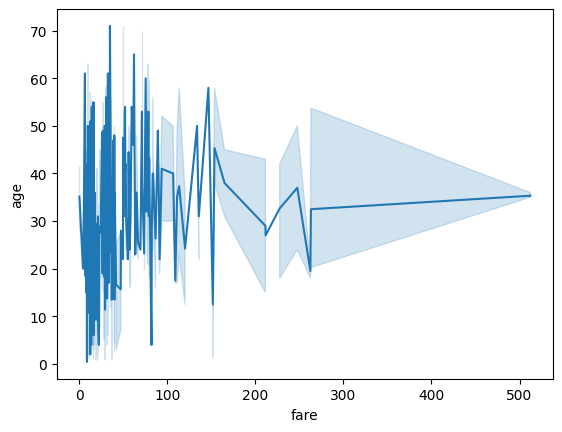

In [13]:
sns.lineplot(x='fare',y='age',data=ndf)

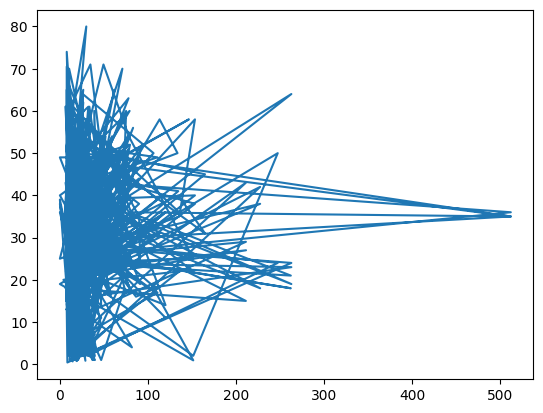

In [14]:
plt.plot(ndf.fare, ndf.age)

In [15]:
tips = sns.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<Axes: xlabel='day', ylabel='total_bill'>

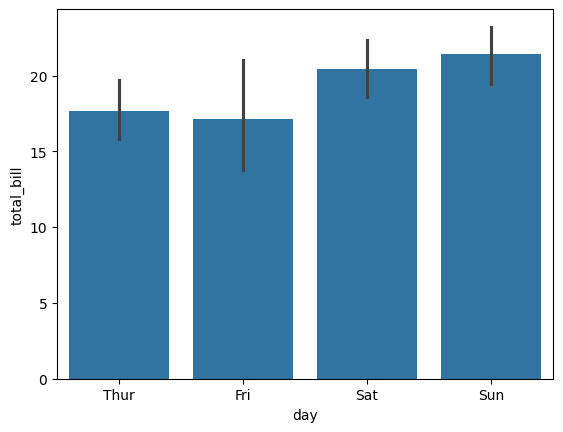

In [16]:
sns.barplot(x='day', y='total_bill', data=tips)

<BarContainer object of 244 artists>

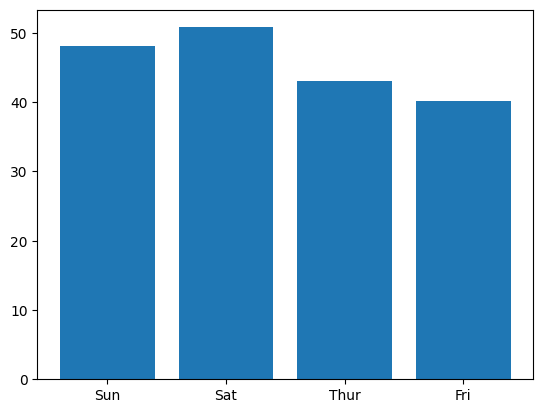

In [17]:
plt.bar(tips.day, tips.total_bill)

In [18]:
tips.groupby('day', observed=True).describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

In [19]:
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

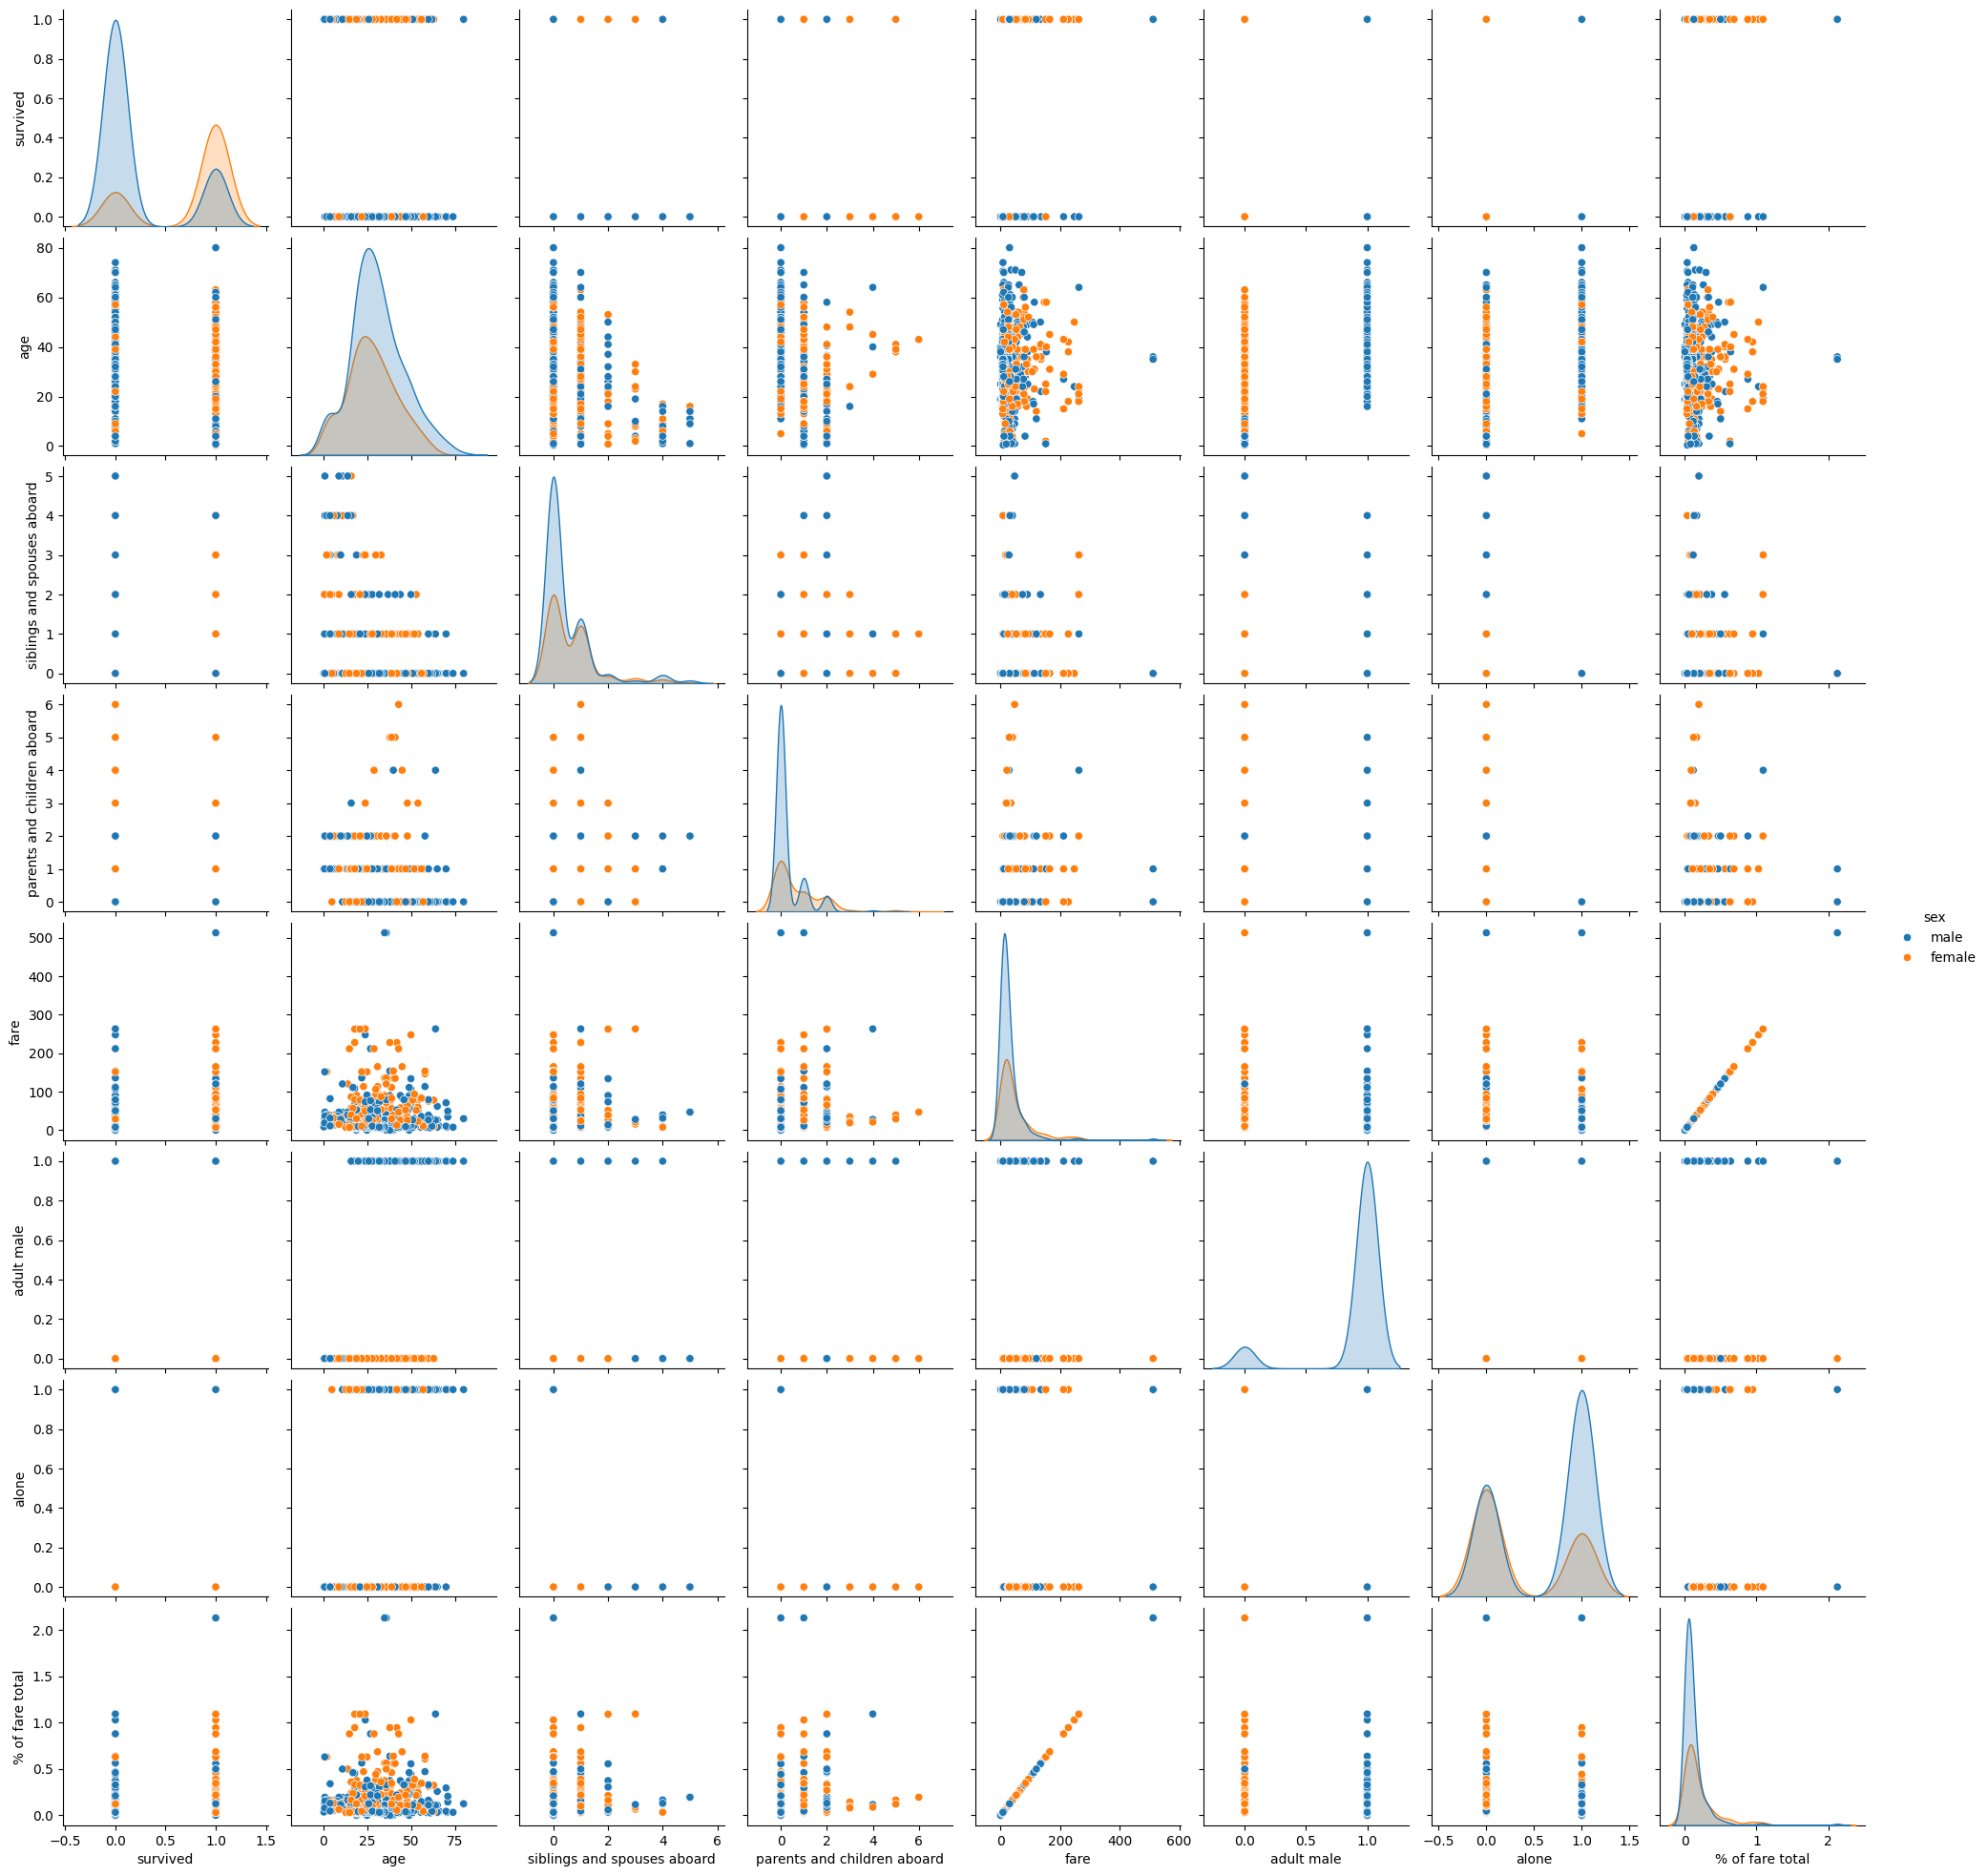

In [20]:
sns.pairplot(ndf, hue='sex')

In [21]:
flights = sns.load_dataset('flights')
flights

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

In [22]:
fp = flights.pivot(index='year',columns='month',values='passengers')
fp

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432

<Axes: xlabel='month', ylabel='year'>

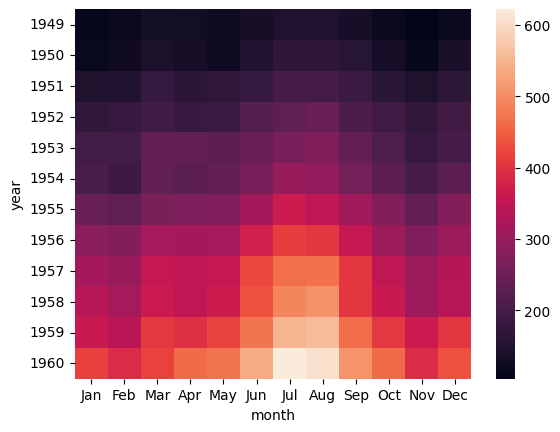

In [23]:
sns.heatmap(fp, annot=False, fmt='d')

In [24]:
vis_df = sns.load_dataset('titanic')
vis_df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

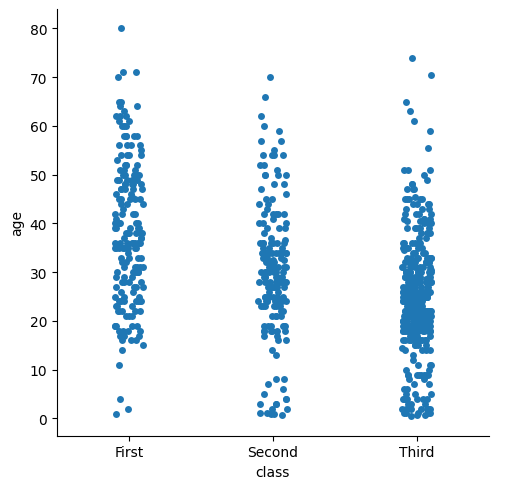

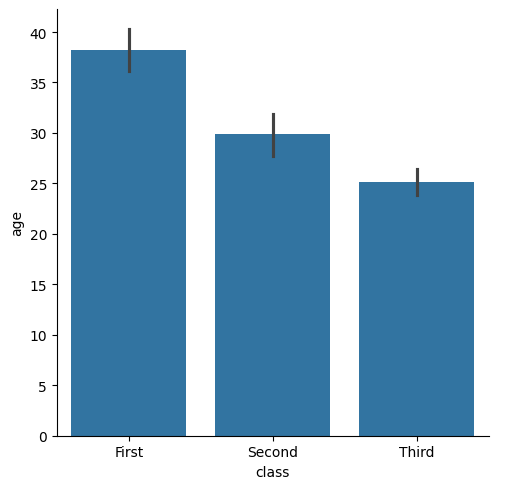

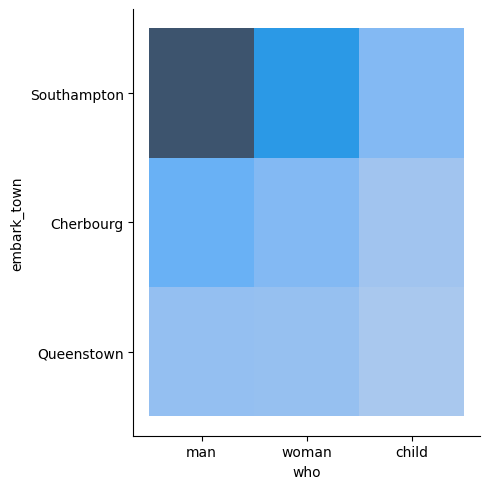

In [25]:
print(sns.catplot(data=vis_df, x='class', y='age'))
print(sns.catplot(data=vis_df, x='class', y='age', kind='bar'))
print(sns.displot(data=vis_df, x='who', y='embark_town', kind='hist'))
# test_df = sns.displot(data=vis_df, x='who', y='embark_town')
# test_df = vis_df.groupby('embark_town', observed=True)['age'].mean()
# print(test_df)


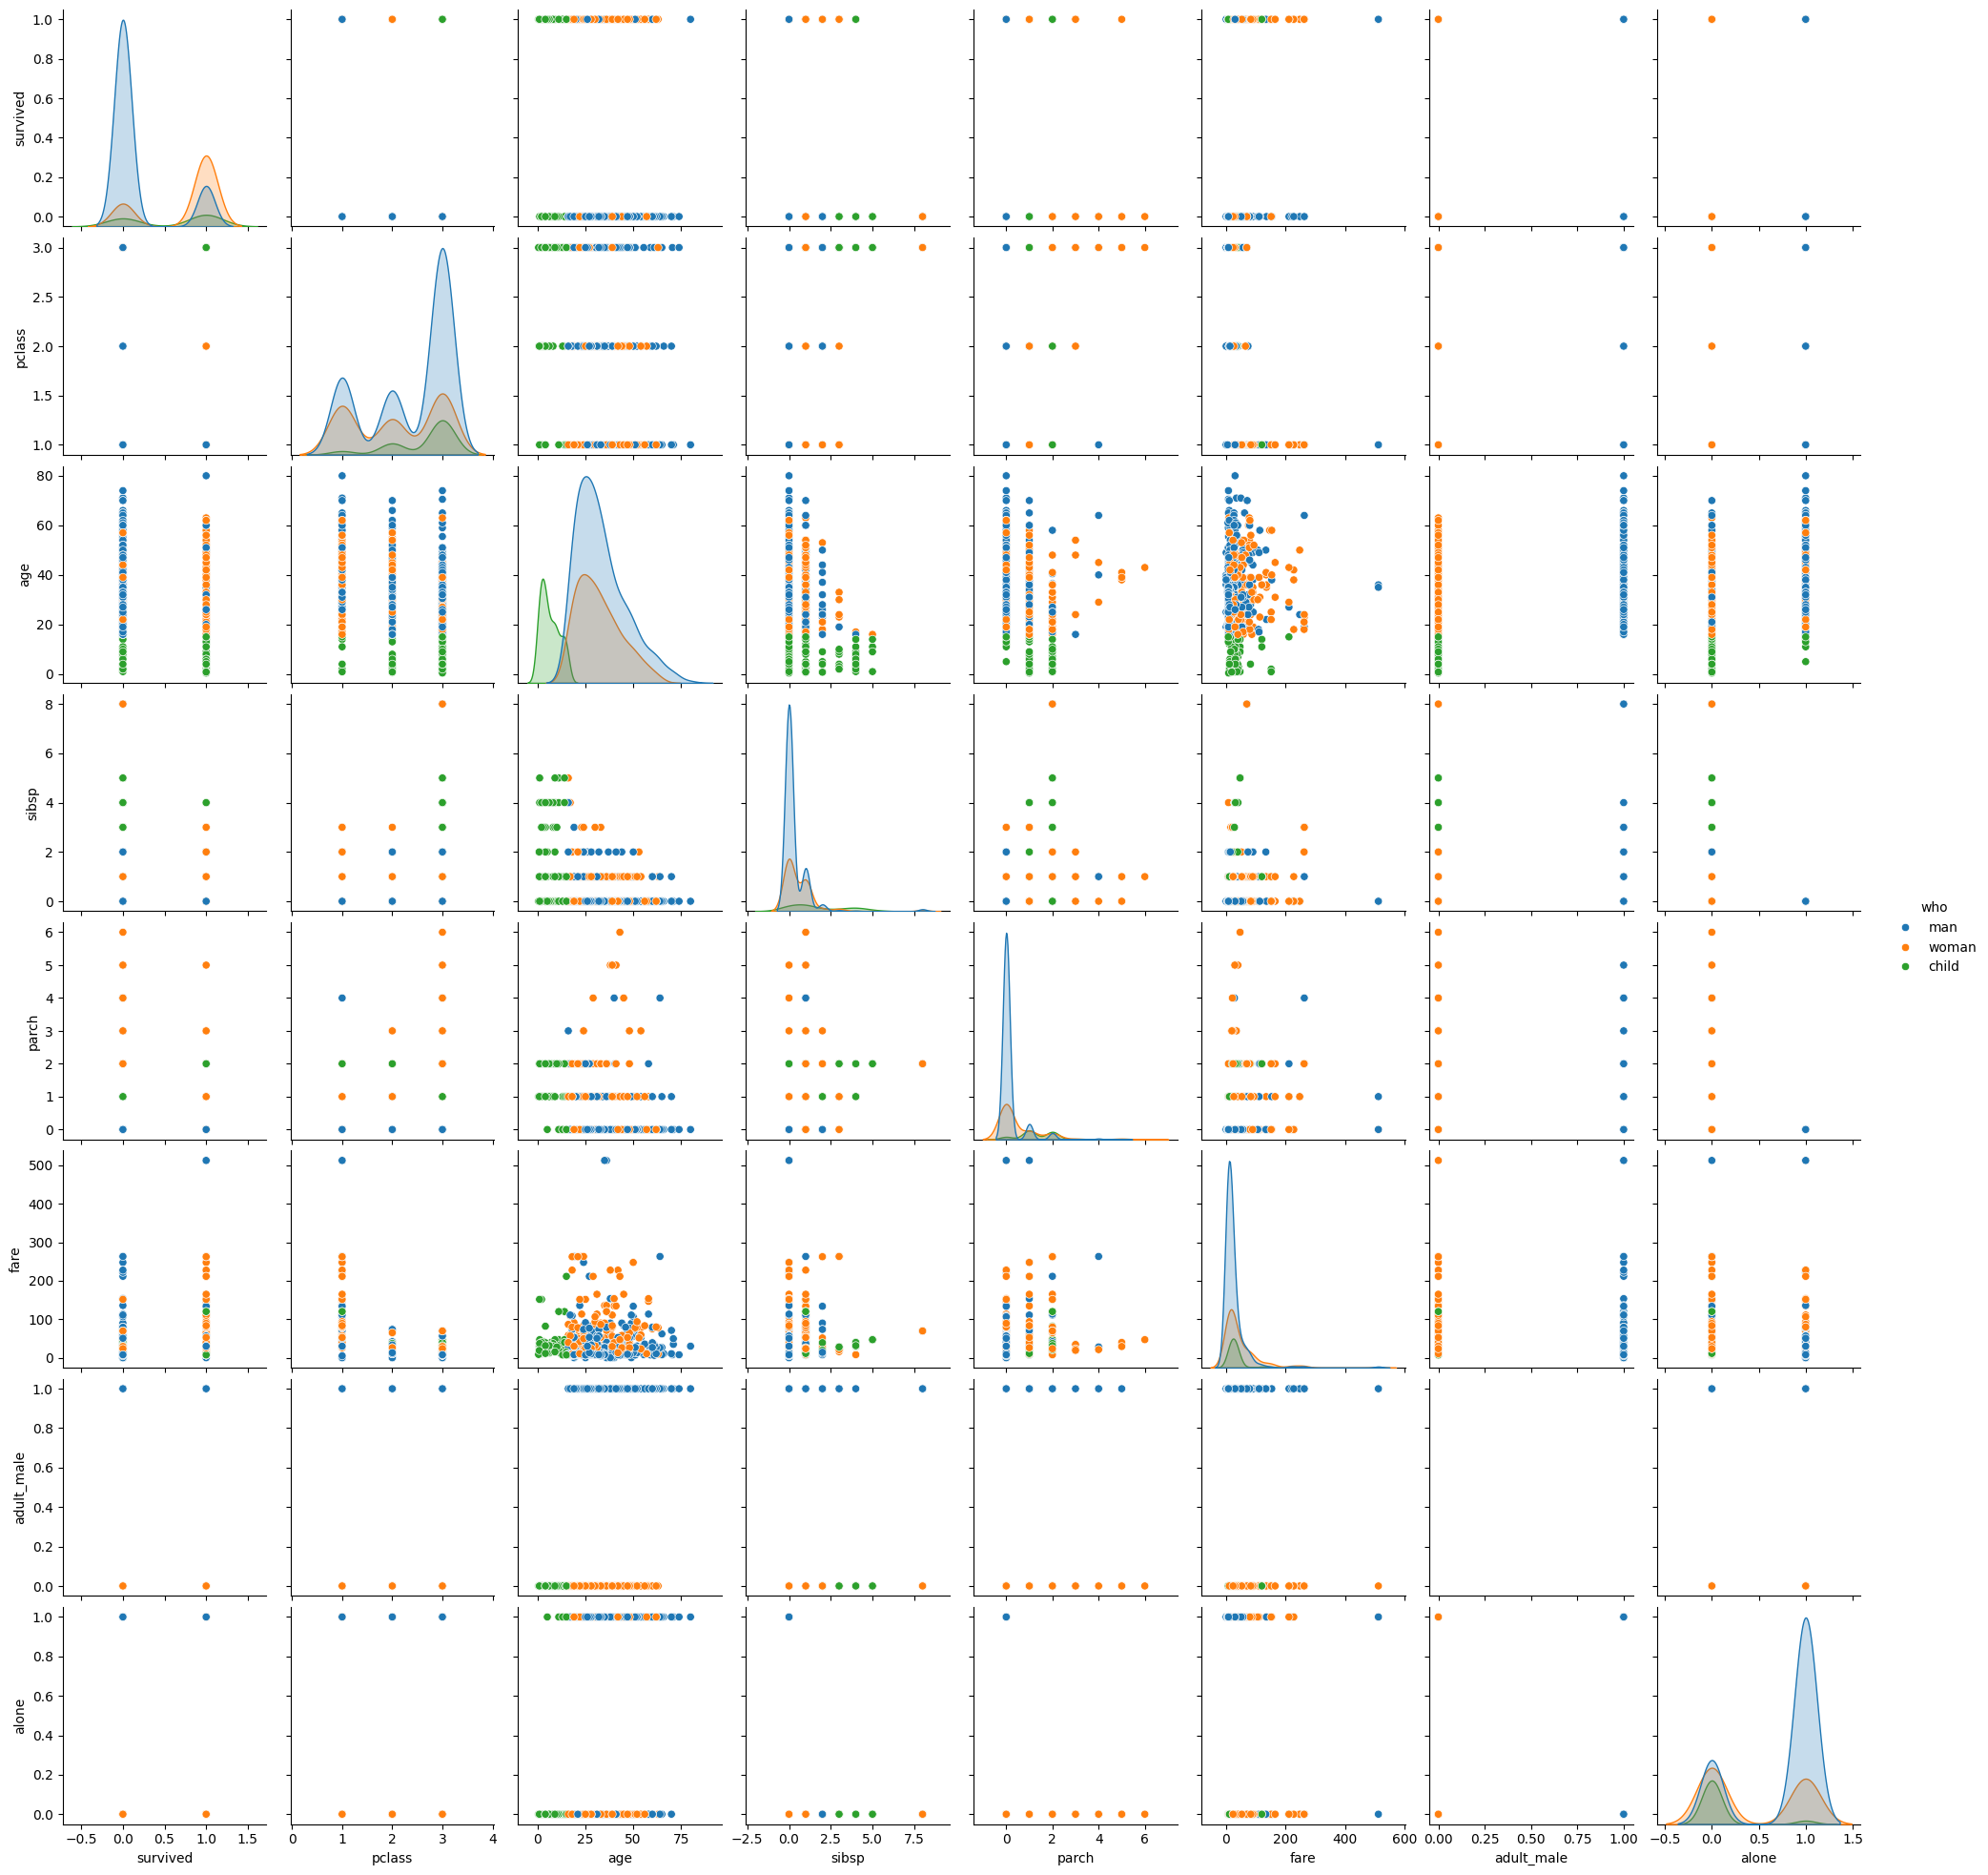

In [26]:
sns.pairplot(vis_df, hue='who')

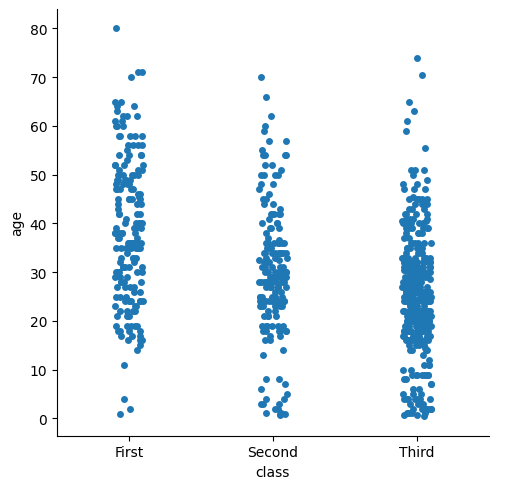

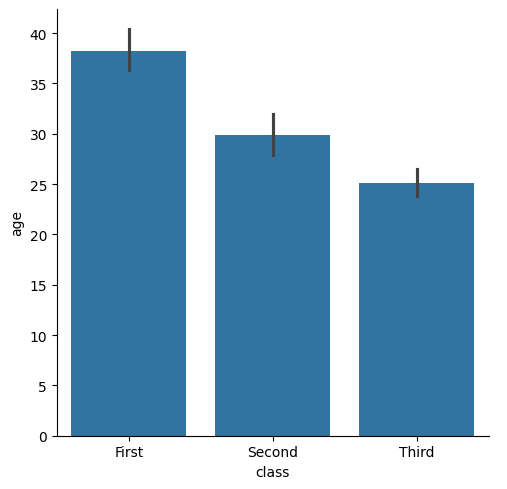

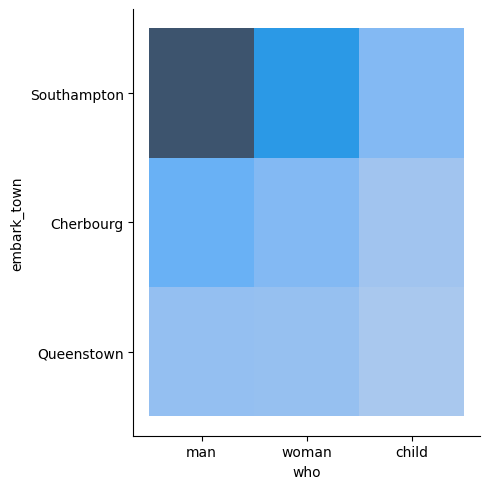

In [27]:
#sns.pairplot(vis_df, hue='')
vis_df = vis_df.drop("deck",axis=1)

print(sns.catplot(data=vis_df, x='class', y='age'))
print(sns.catplot(data=vis_df, x='class', y='age', kind='bar'))
print(sns.displot(data=vis_df, x='who', y='embark_town', kind='hist'))

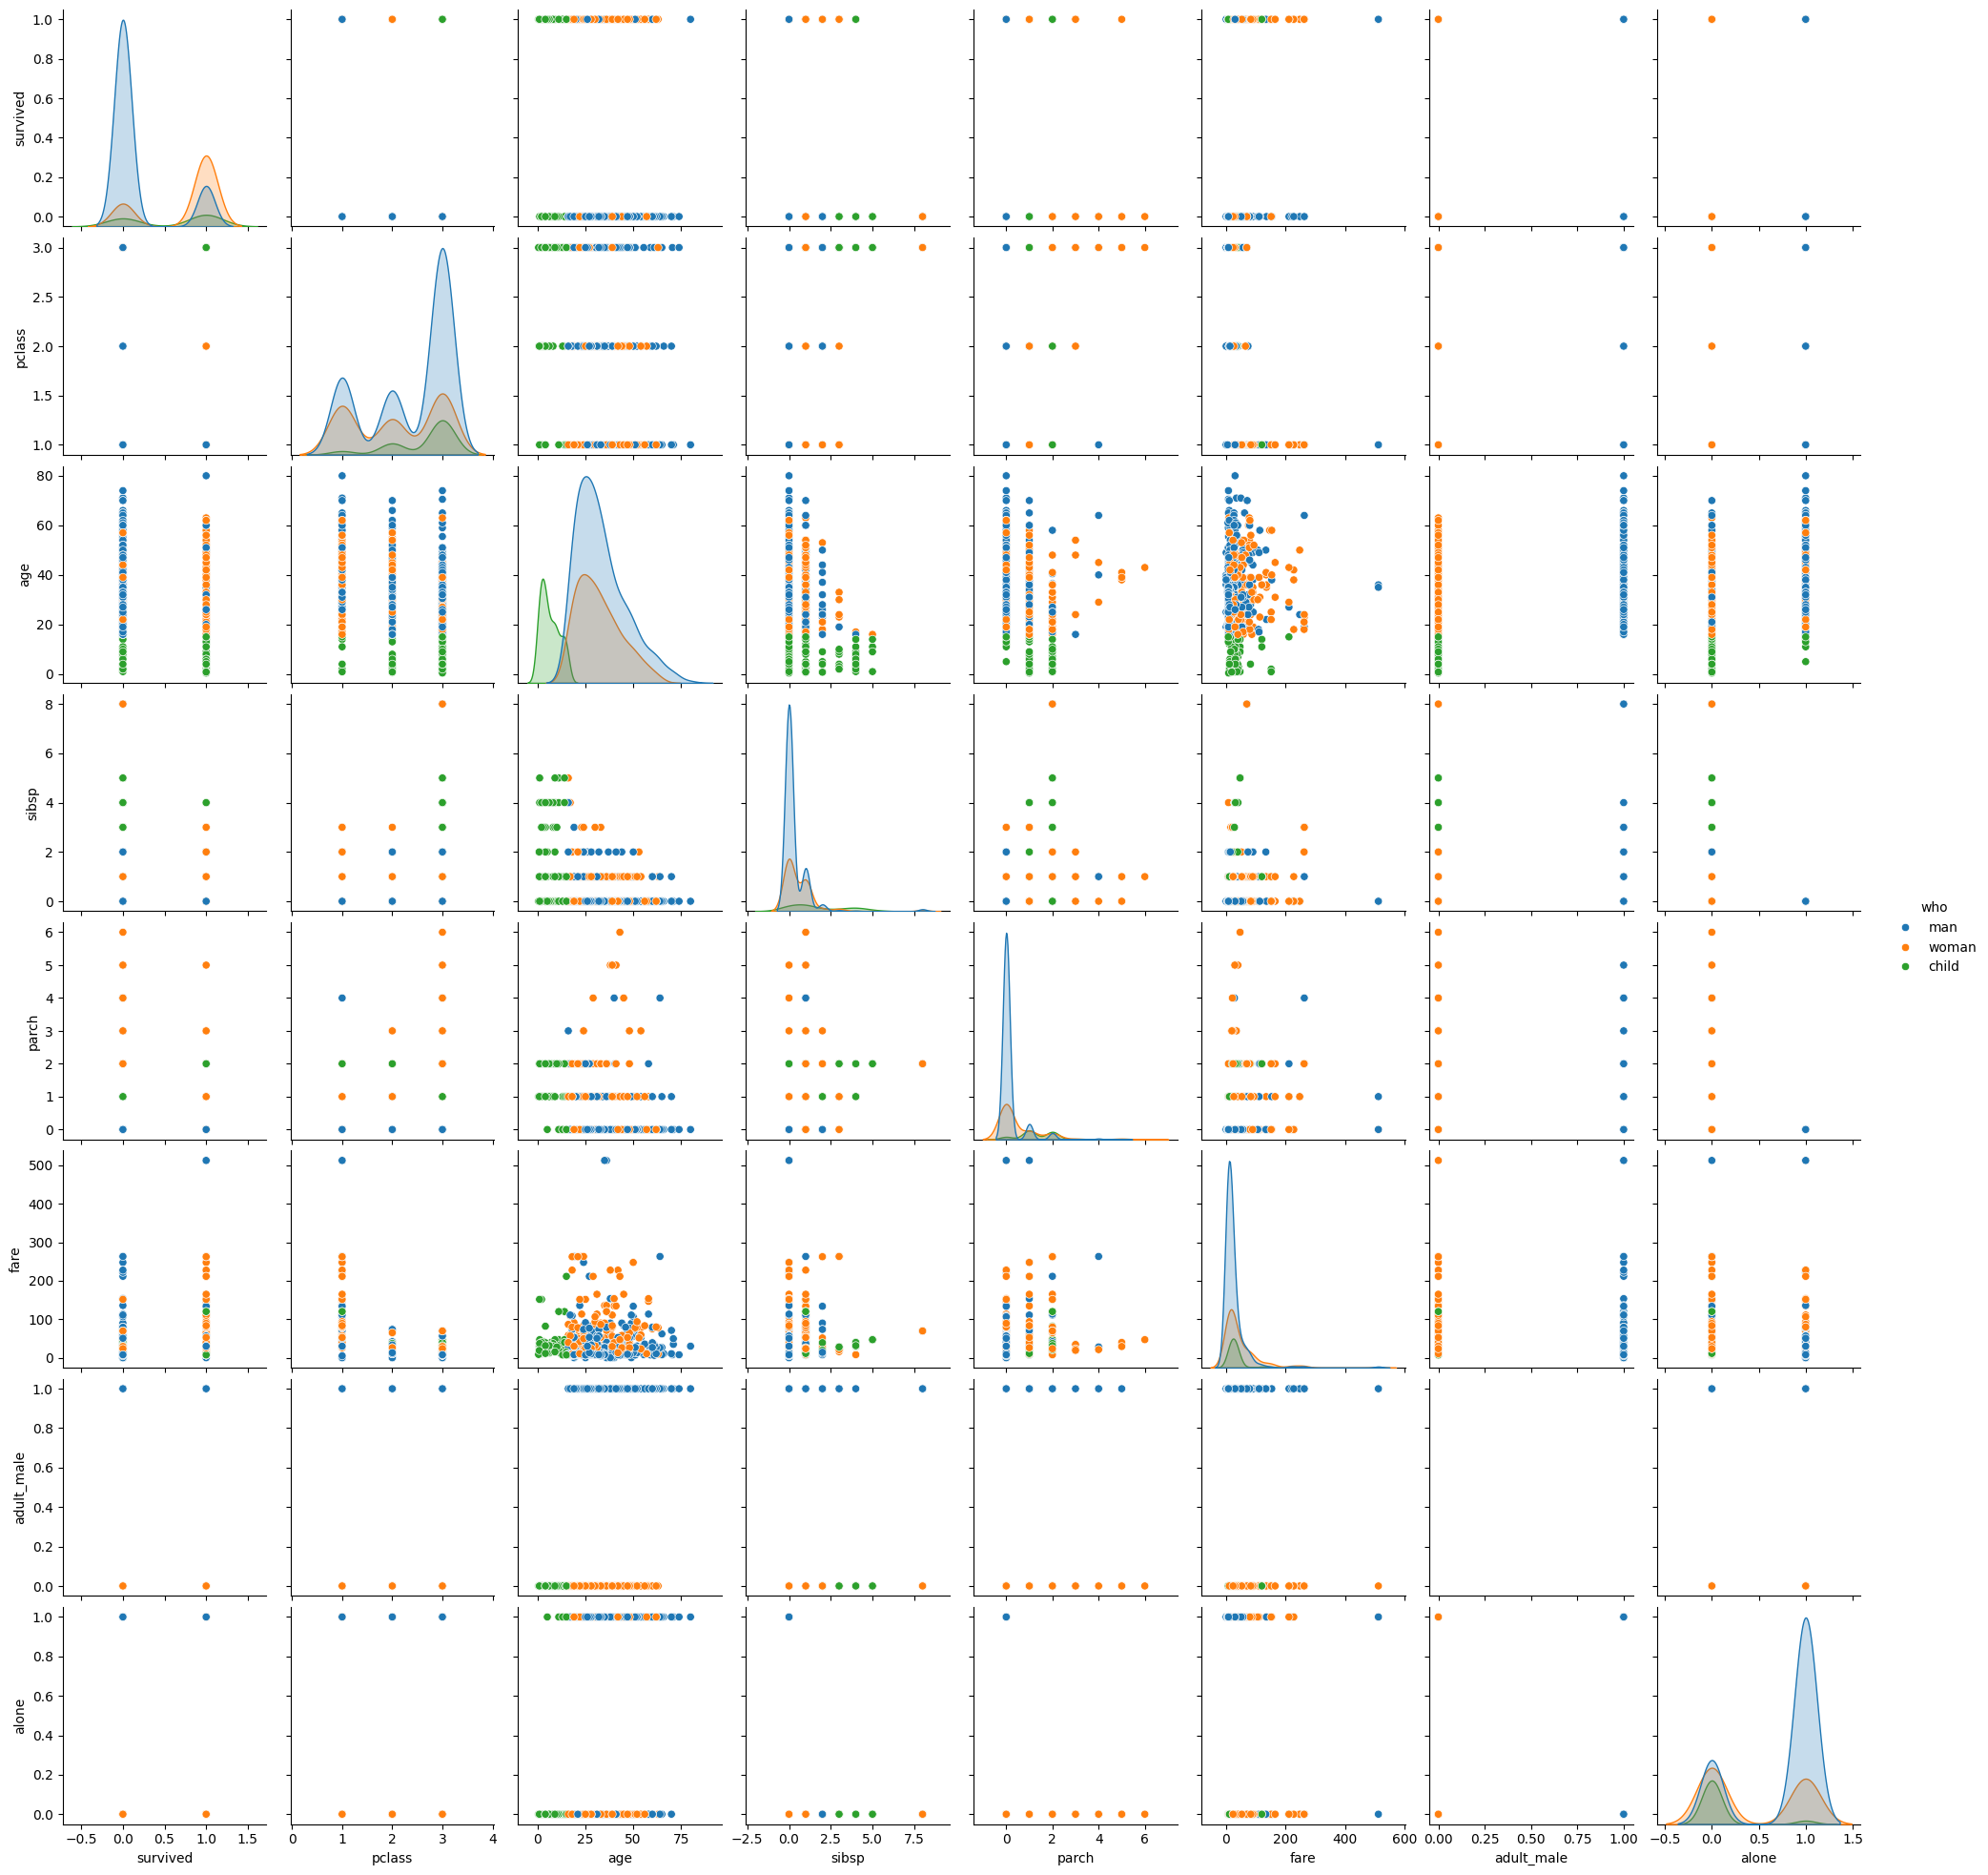

In [28]:
sns.pairplot(vis_df, hue='who')

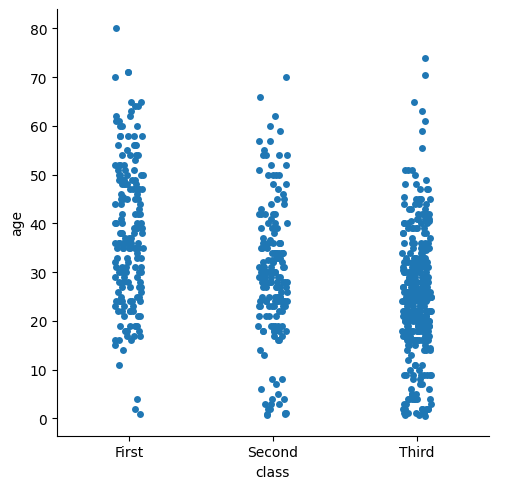

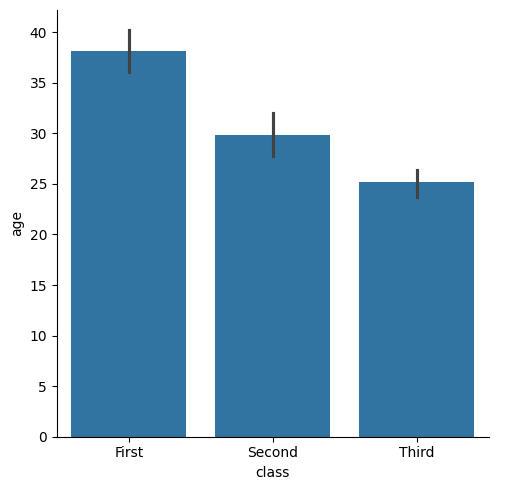

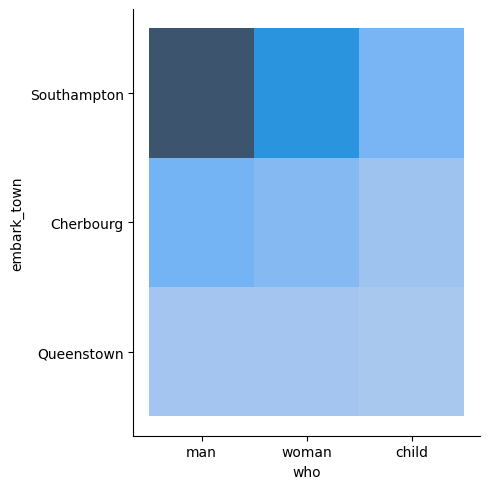

In [29]:
vis_df = vis_df.dropna()

print(sns.catplot(data=vis_df, x='class', y='age'))
print(sns.catplot(data=vis_df, x='class', y='age', kind='bar'))
print(sns.displot(data=vis_df, x='who', y='embark_town', kind='hist'))

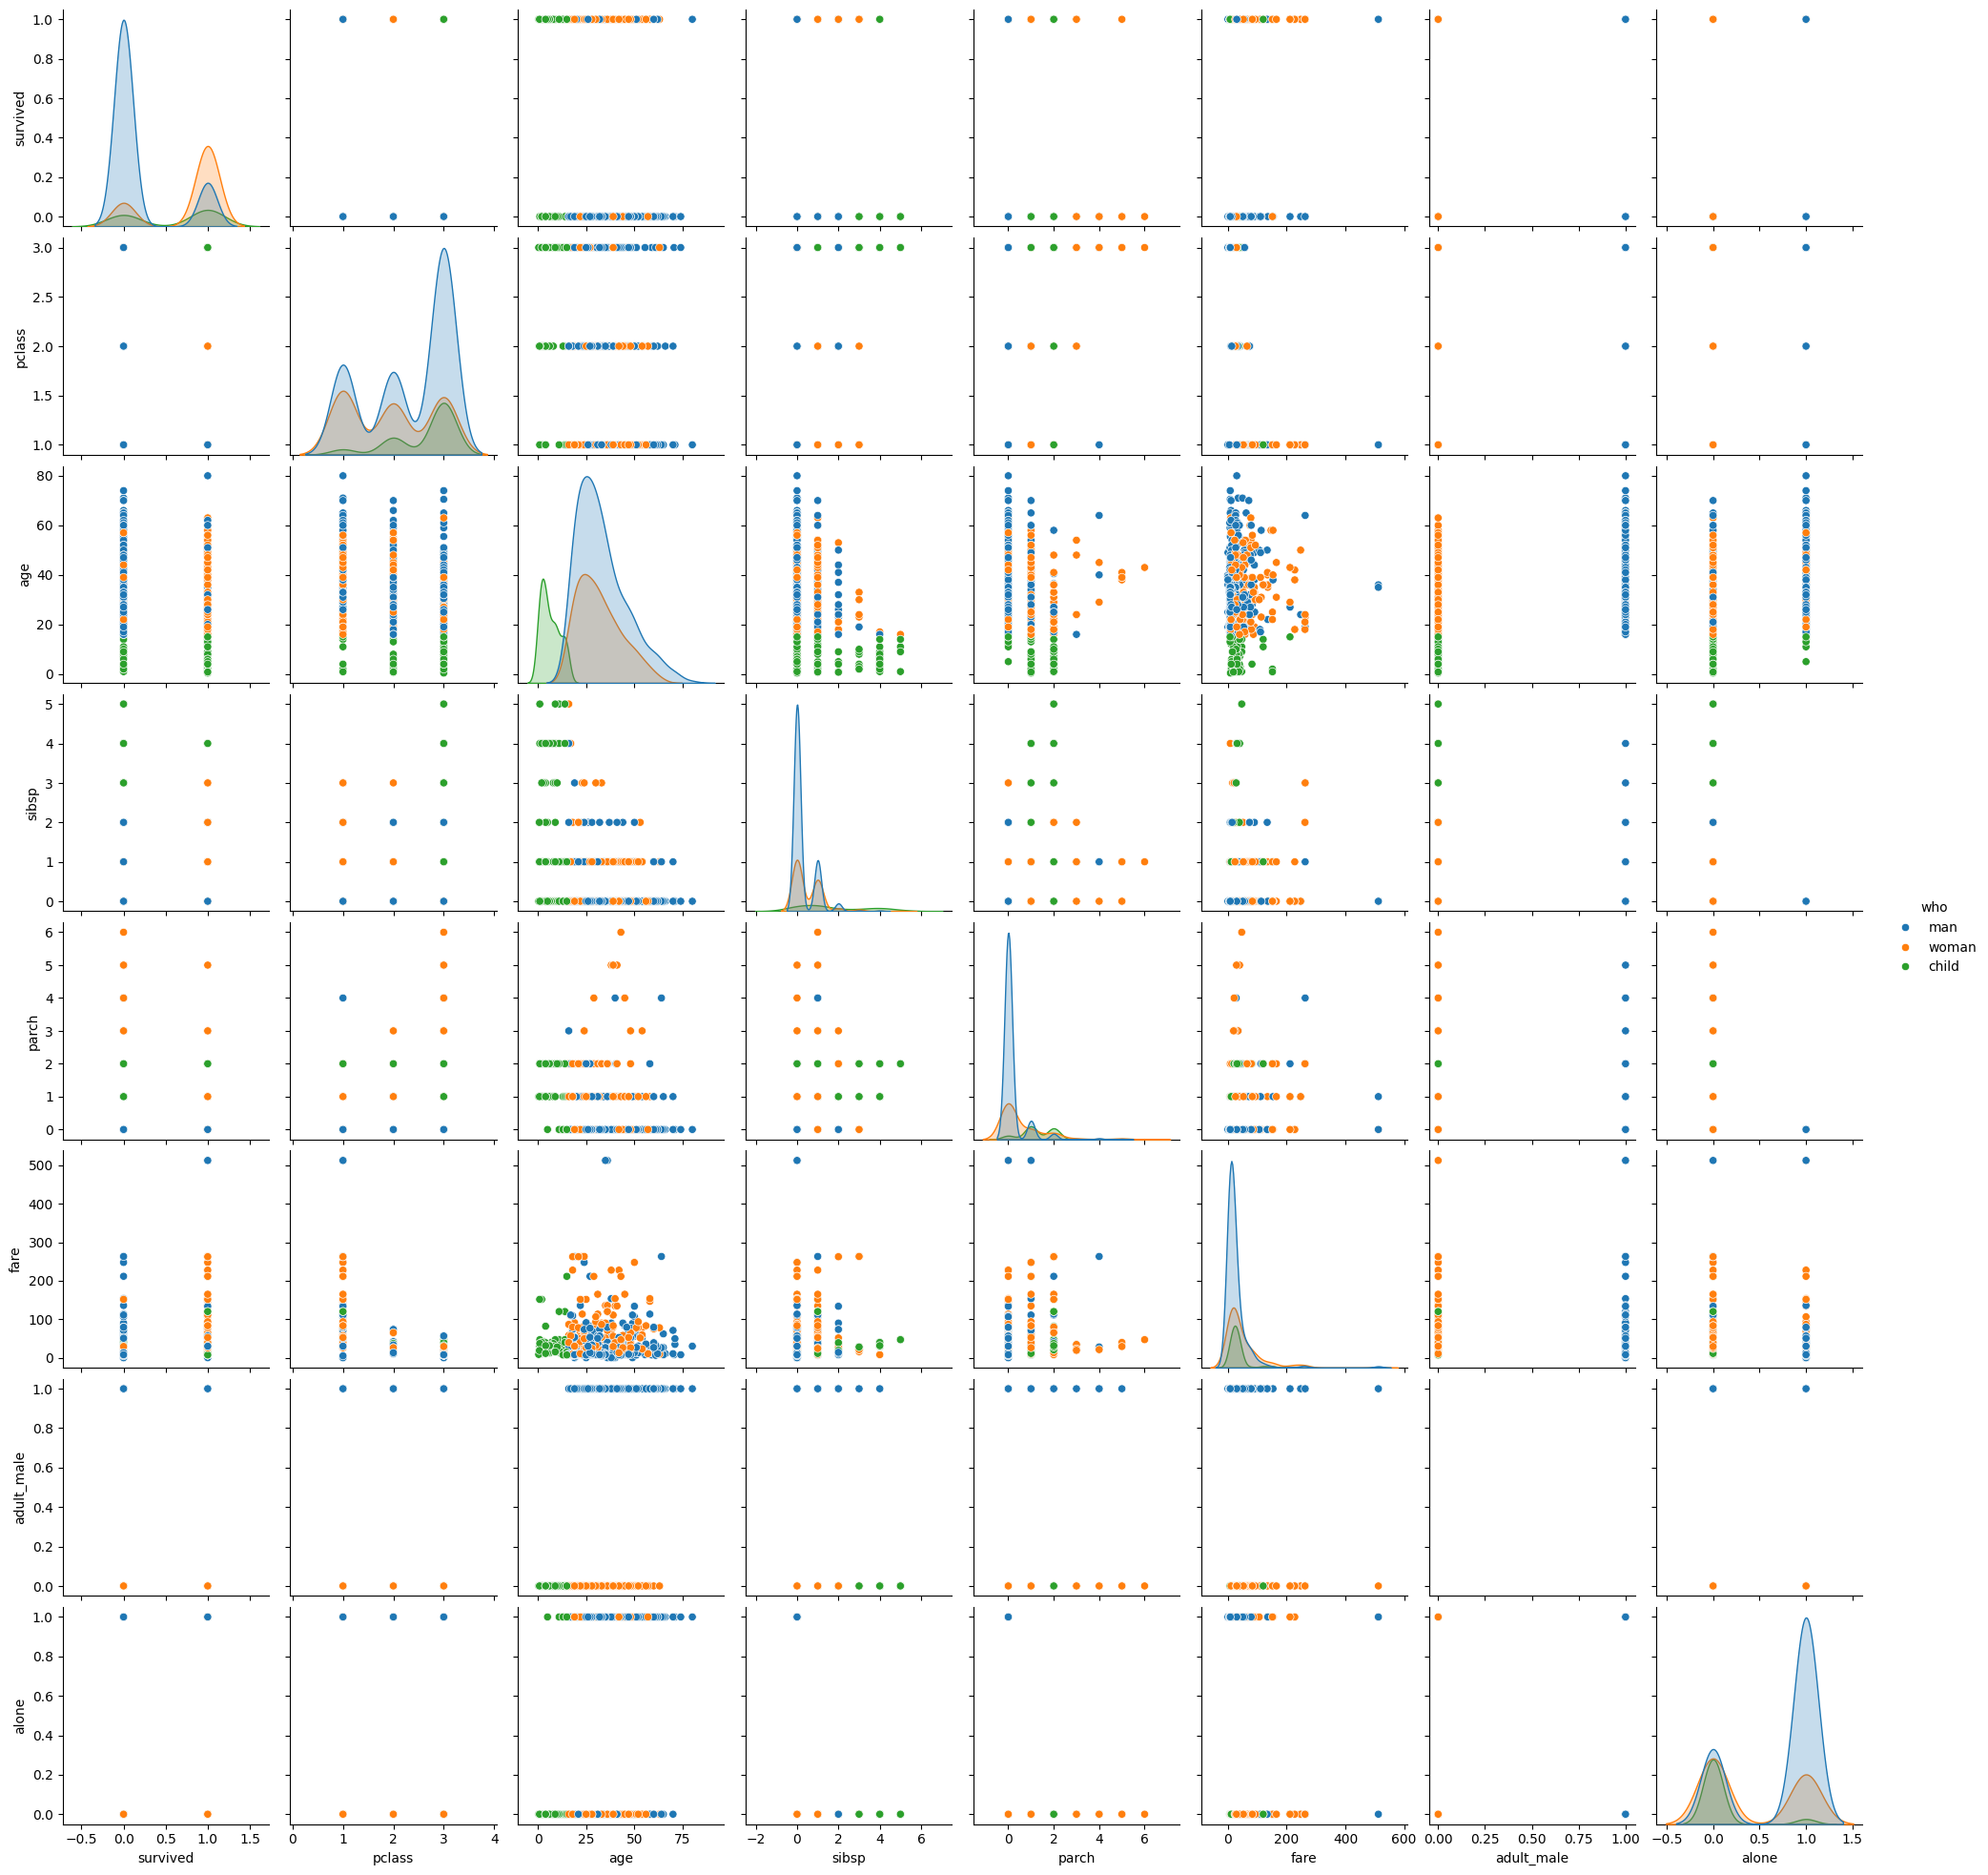

In [30]:
sns.pairplot(vis_df, hue='who')

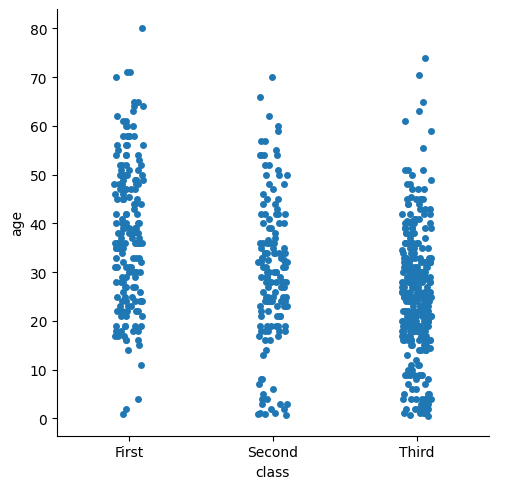

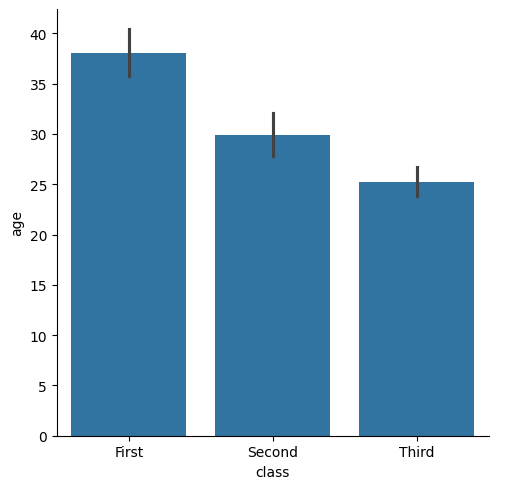

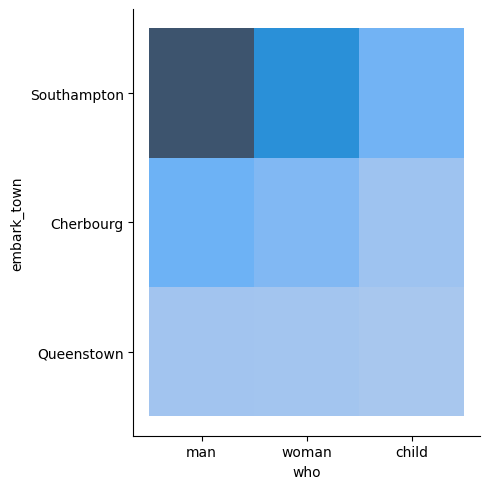

In [31]:
vis_df = vis_df.drop_duplicates()

print(sns.catplot(data=vis_df, x='class', y='age'))
print(sns.catplot(data=vis_df, x='class', y='age', kind='bar'))
print(sns.displot(data=vis_df, x='who', y='embark_town', kind='hist'))

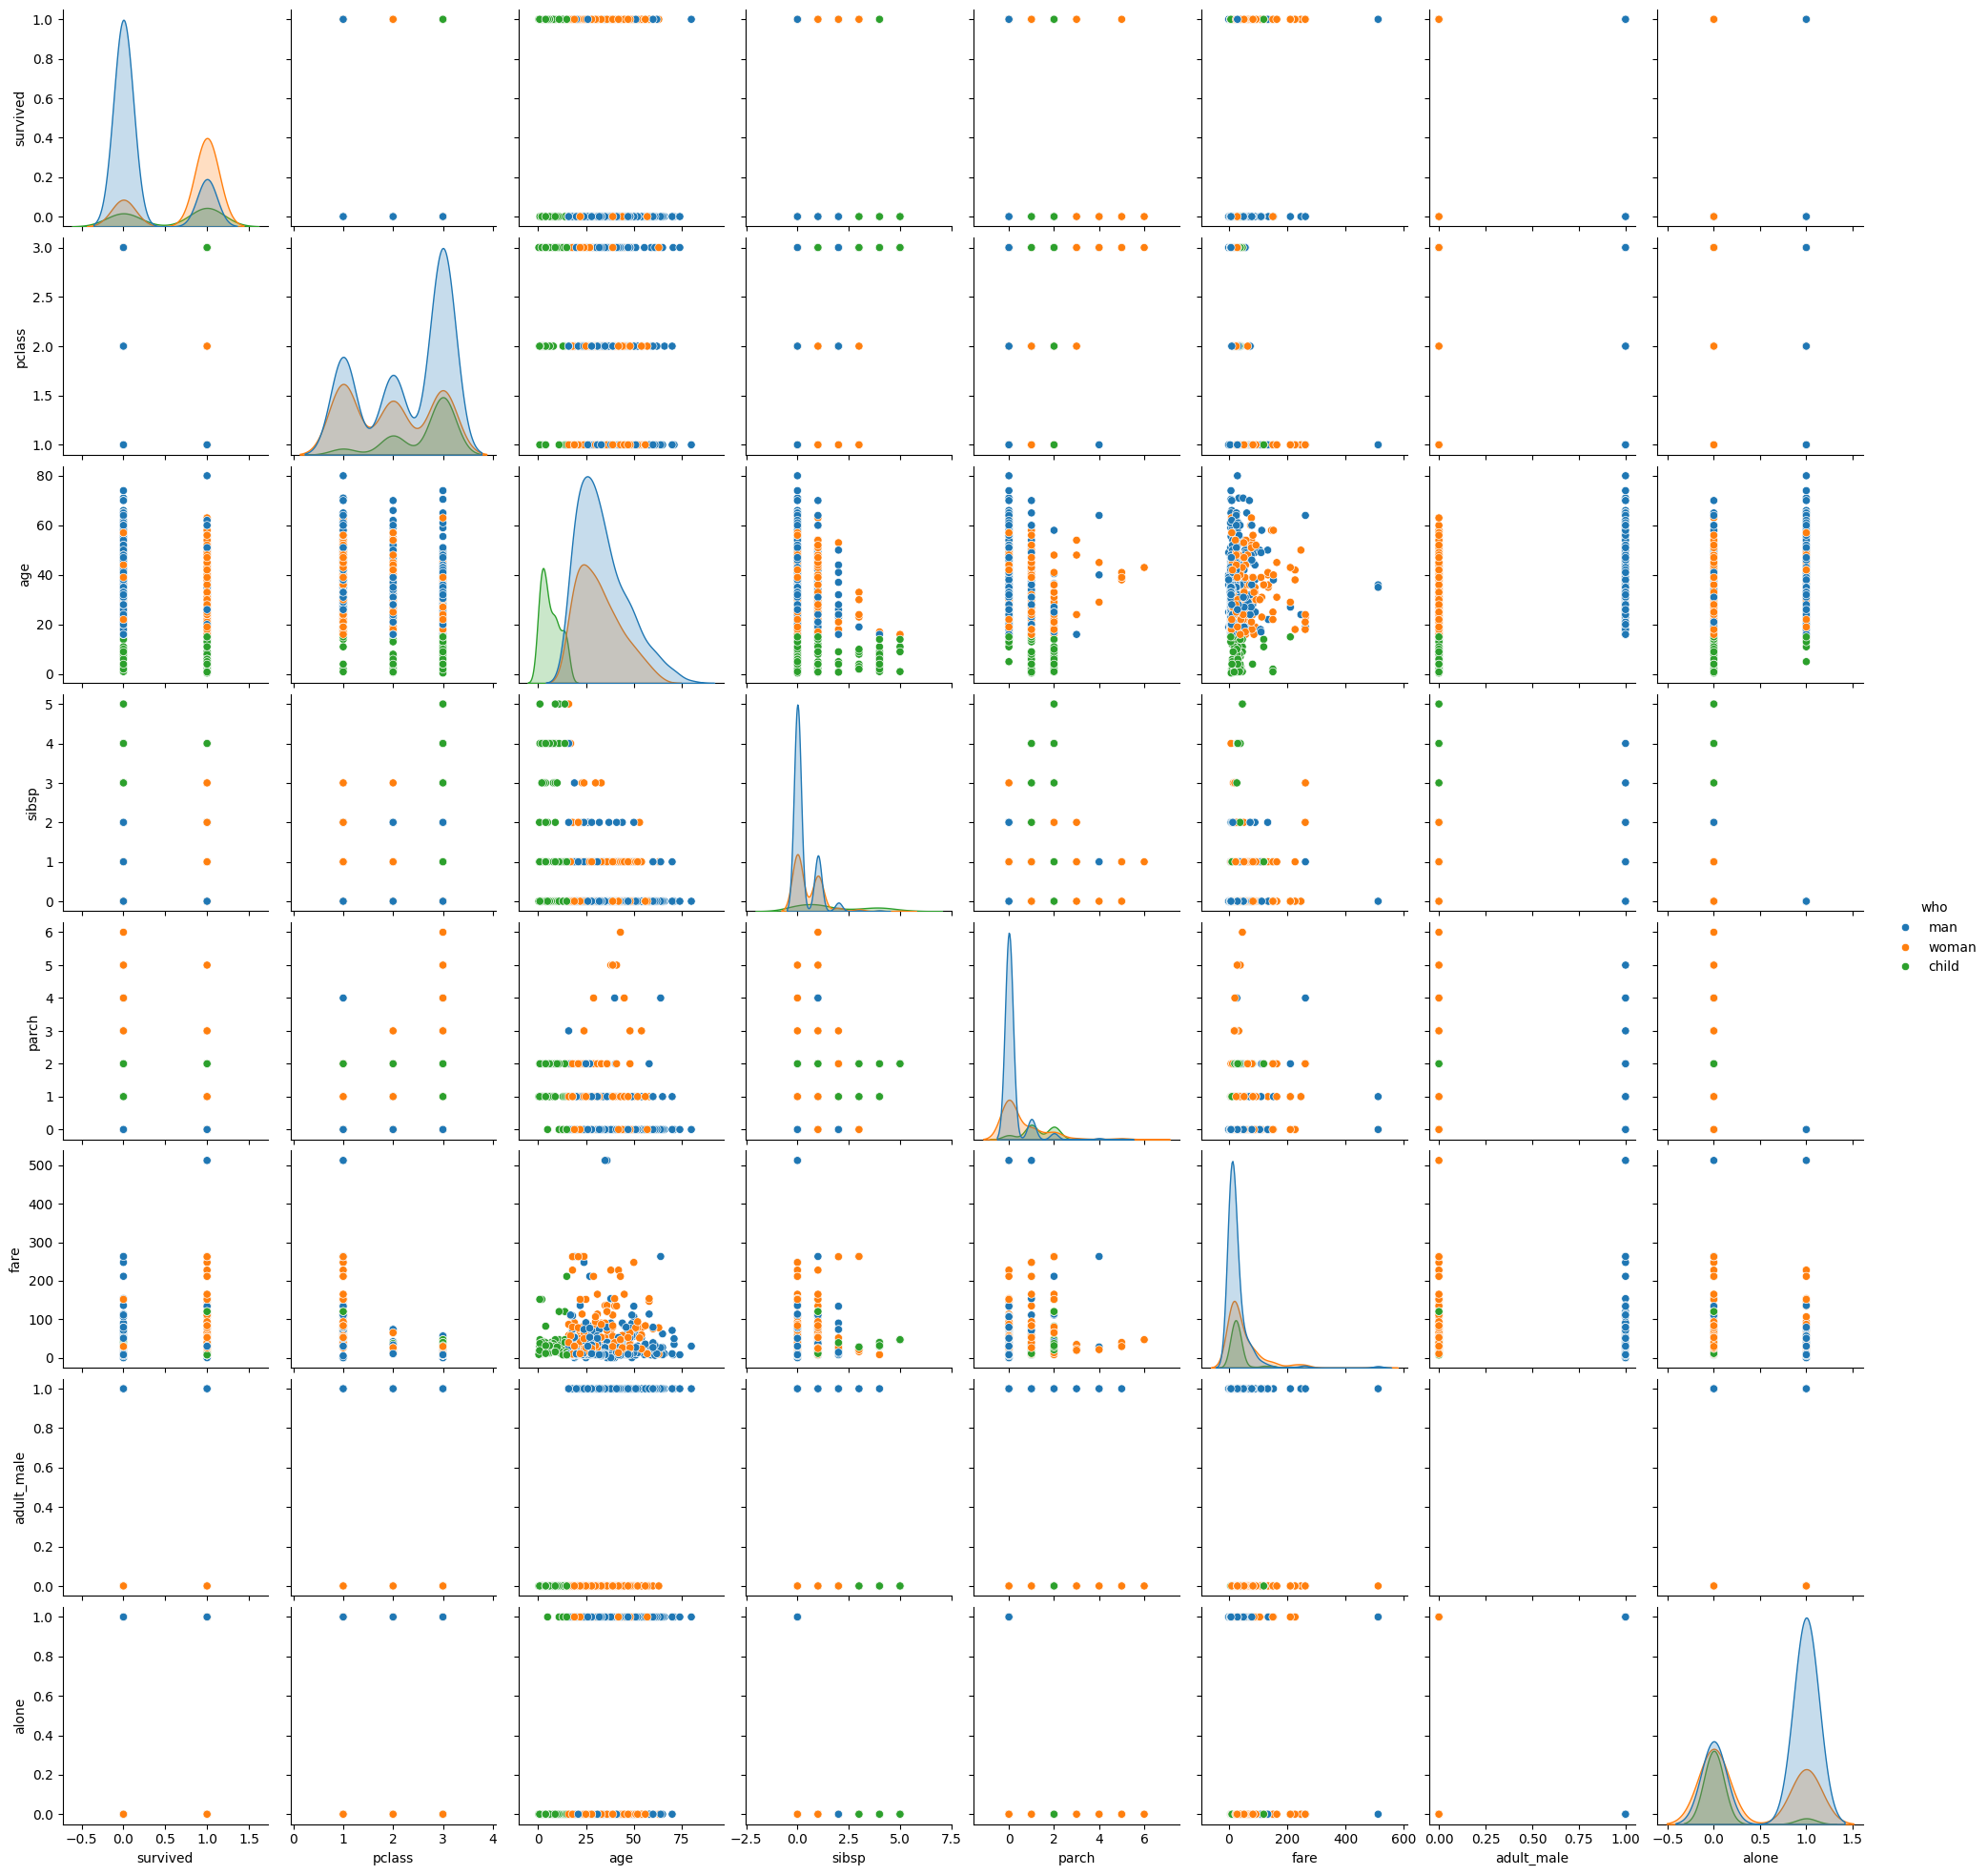

In [32]:
sns.pairplot(vis_df, hue='who')

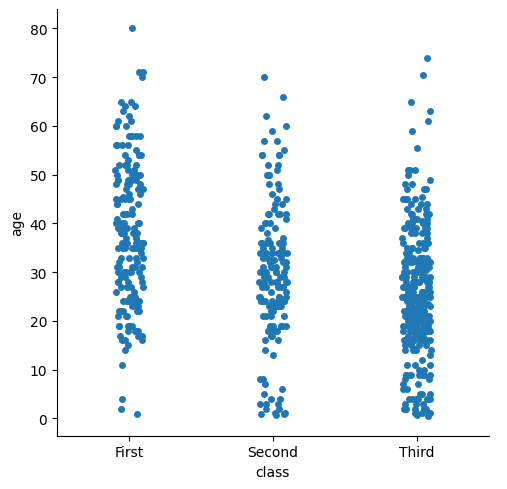

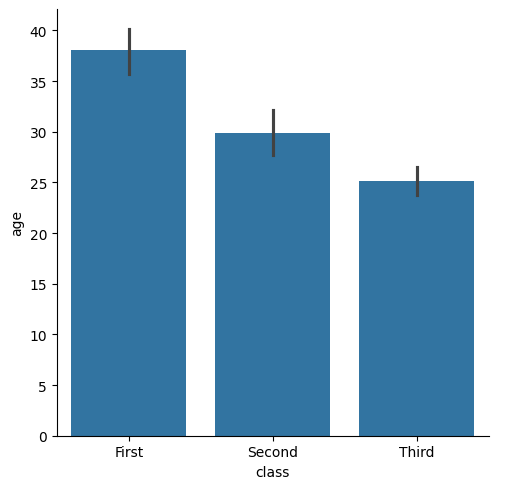

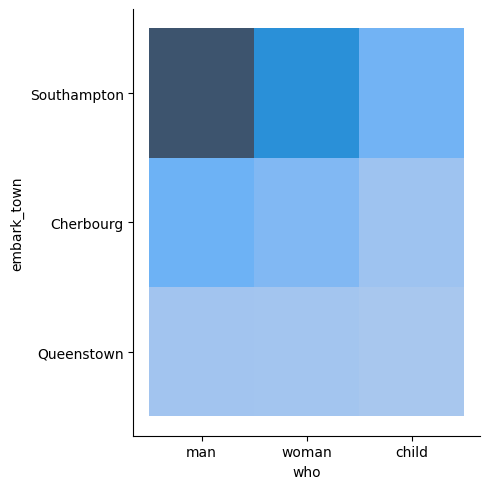

In [33]:
vis_df = vis_df.drop(["alive","pclass","embarked"], axis=1)

print(sns.catplot(data=vis_df, x='class', y='age'))
print(sns.catplot(data=vis_df, x='class', y='age', kind='bar'))
print(sns.displot(data=vis_df, x='who', y='embark_town', kind='hist'))

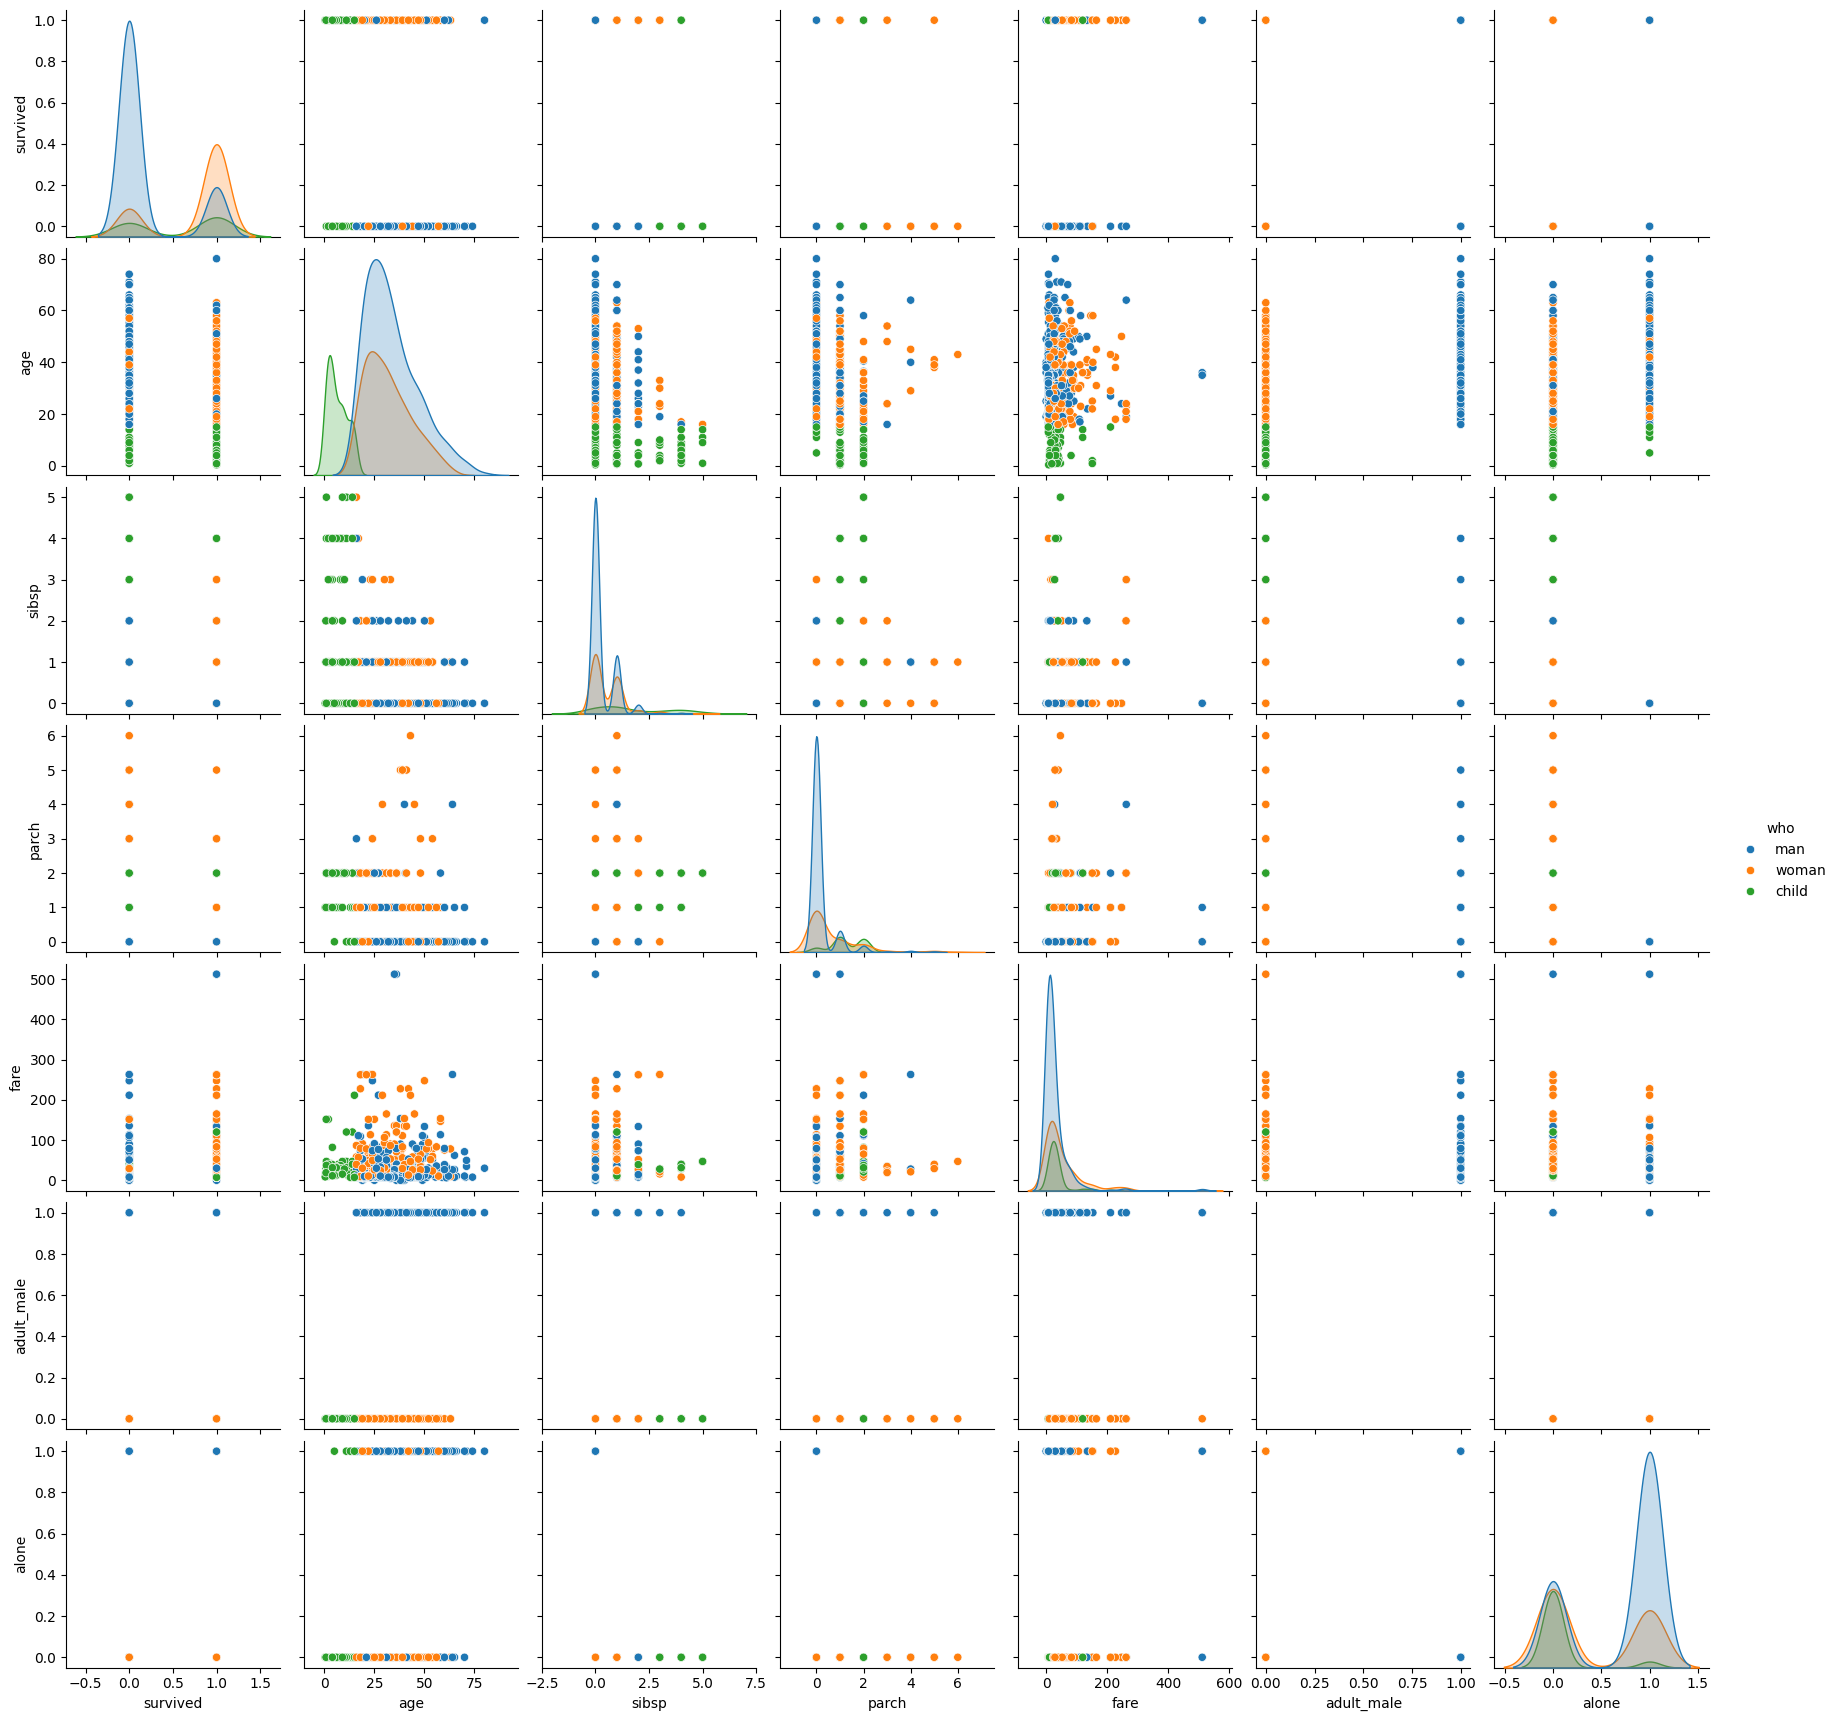

In [34]:
sns.pairplot(vis_df, hue='who')

<Axes: xlabel='survived', ylabel='age'>

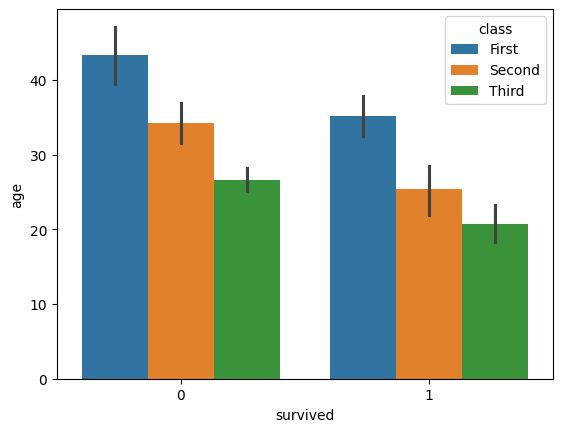

In [35]:
sns.barplot(data=vis_df, x='survived', y='age', hue='class')

<Axes: xlabel='class', ylabel='survived'>

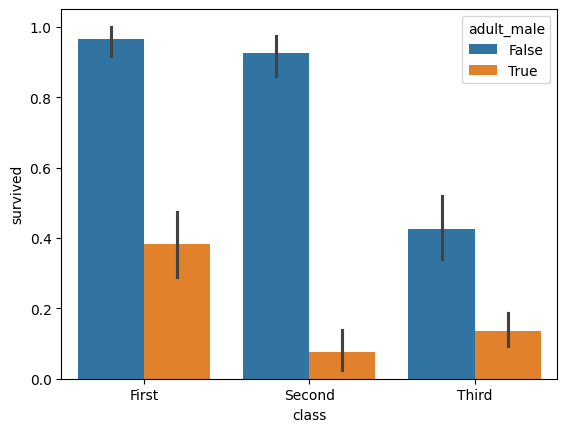

In [36]:
ex_df = vis_df.groupby(['sex','survived'])[['survived','age']].describe()
sns.barplot(data=vis_df, x='class', y=('survived'), hue='adult_male')

In [45]:
health = sns.load_dataset('healthexp')
health

Year        Country  Spending_USD  Life_Expectancy
0    1970        Germany       252.311             70.6
1    1970         France       192.143             72.2
2    1970  Great Britain       123.993             71.9
3    1970          Japan       150.437             72.0
4    1970            USA       326.961             70.9
..    ...            ...           ...              ...
269  2020        Germany      6938.983             81.1
270  2020         France      5468.418             82.3
271  2020  Great Britain      5018.700             80.4
272  2020          Japan      4665.641             84.7
273  2020            USA     11859.179             77.0

[274 rows x 4 columns]

In [38]:
piv_health = health.pivot(index='Country',columns='Year', values='Life_Expectancy')
piv_health

Year           1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
Country                                                                     
Canada          NaN  72.8   NaN   NaN   NaN   NaN  73.8   NaN   NaN  75.1   
France         72.2   NaN   NaN   NaN   NaN  73.0   NaN   NaN   NaN   NaN   
Germany        70.6  70.8  71.0  71.3  71.5  71.4  71.8  72.5  72.4  72.8   
Great Britain  71.9  71.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Japan          72.0  72.9  73.2  73.4  73.7  74.3  74.8  75.3  75.7  76.2   
USA            70.9  71.2  71.2  71.4  72.0  72.7  72.9  73.3  73.5  73.9   

Year           ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  
Country        ...                                                              
Canada         ...  81.4  81.6  81.7  81.8  81.9  82.0  81.9  82.0  82.2  81.7  
France         ...  82.3  82.1  82.3  82.8  82.4  82.7  82.7  82.8  82.9  82.3  
Germany        ...  80.5  80.6  80.6  81.2  80.7  81.0  81.1  81.0  81.3  81.1  
Great Britain  ...  81.0  81.0  81.1  81.4  81.0  81.2  81.3  81.3  81.4  80.4  
Japan          ...  82.7  83.2  83.4  83.7  83.9  84.1  84.2  84.3  84.4  84.7  
USA            ...  78.7  78.8  78.8  78.9  78.7  78.7  78.6  78.7  78.8  77.0  

[6 rows x 51 columns]

<Axes: xlabel='Year', ylabel='Country'>

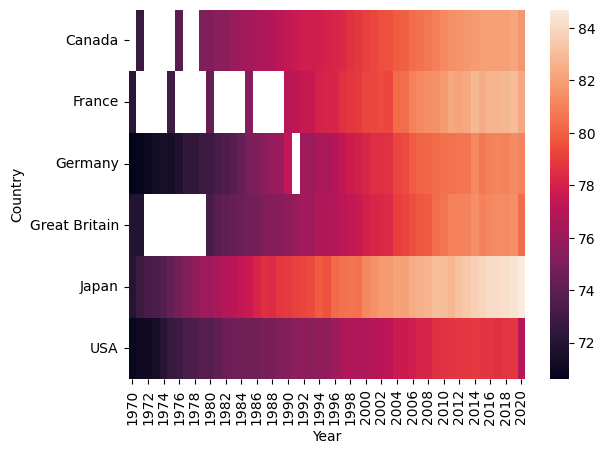

In [40]:
sns.heatmap(piv_health)

Country  Canada  France  Germany  Great Britain  Japan   USA
Year                                                        
1980       75.2    74.3     72.9           73.2   76.1  73.7
1985       76.3    75.4     75.0           74.7   77.6  74.7
1990       77.3    77.0     77.3           75.7   78.9  75.3
1992       77.8    77.5     76.1           76.3   79.2  75.7
1993       77.8    77.5     76.1           76.2   79.4  75.5
1994       77.9    78.0     76.5           76.8   79.8  75.7
1995       78.0    78.1     76.6           76.7   79.6  75.7
1996       78.2    78.2     76.9           76.9   80.3  76.1
1997       78.3    78.6     77.3           77.2   80.5  76.5
1998       78.6    78.8     77.7           77.3   80.6  76.7
1999       78.8    78.9     77.9           77.5   80.5  76.7
2000       79.1    79.2     78.2           77.9   81.2  76.7
2001       79.3    79.3     78.5           78.2   81.5  76.9
2002       79.5    79.4     78.5           78.3   81.8  77.0
2003       79.6    79.3 

<Axes: xlabel='Country', ylabel='Year'>

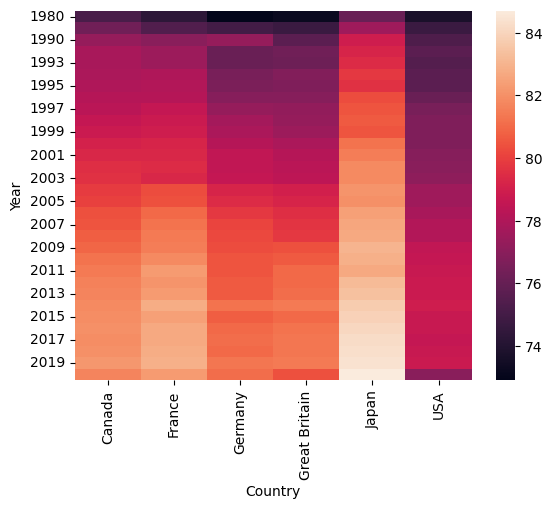

In [49]:
health = health.dropna()
#print(health)
piv_health = health.pivot(index='Year',columns='Country', values='Life_Expectancy')
piv_health = piv_health.dropna()
print(piv_health)

sns.heatmap(piv_health)



In [58]:
piv2_health = health.pivot(index='Year',columns='Country', values='Spending_USD')
piv2_health = piv2_health.dropna()
piv2_health

Country    Canada    France   Germany  Great Britain     Japan        USA
Year                                                                     
1980      791.812   659.826   908.166        385.099   535.016   1036.300
1985     1212.850  1001.145  1298.555        549.608   818.382   1735.156
1990     1699.774  1459.110  1724.332        782.612  1088.959   2684.984
1992     1897.456  1651.139  2019.308        930.701  1253.415   3100.343
1993     1930.889  1753.485  2040.313        995.728  1332.213   3286.558
1994     1962.196  1817.042  2188.676       1058.680  1420.271   3432.101
1995     1984.944  2100.918  2349.145       1094.034  1413.445   3586.745
1996     1999.778  2169.451  2480.217       1171.591  1436.372   4158.928
1997     2091.997  2236.595  2496.201       1507.352  1529.586   3894.282
1998     2200.468  2321.931  2566.003       1572.097  1571.107   4061.536
1999     2278.254  2431.303  2697.878       1683.905  1667.922   4261.996
2000     2450.593  2687.530  2895.533       1897.202  1847.786   4536.561
2001     2624.293  2875.294  3009.368       2067.167  1945.556   4888.518
2002     2758.065  3152.016  3239.770       2287.476  2065.133   5316.522
2003     2914.206  3056.265  3329.374       2469.159  2194.437   5726.538
2004     3122.396  3170.947  3391.521       2724.869  2303.680   6069.530
2005     3291.912  3264.574  3429.955       2731.445  2471.186   6430.757
2006     3486.621  3444.855  3567.061       2952.329  2561.219   6808.054
2007     3709.615  3588.227  3750.787       3021.671  2689.916   7166.513
2008     3849.544  3729.353  3955.136       3207.853  2799.198   7385.026
2009     3945.873  3880.842  4158.266       3334.506  2971.377   7645.002
2010     4155.529  4045.065  4423.070       3441.710  3169.190   7879.253
2011     4228.962  4161.698  4566.678       3495.652  3740.756   8079.467
2012     4336.249  4299.434  4745.546       3614.131  3970.765   8346.064
2013     4428.753  4544.964  4951.677       3667.636  4308.252   8519.620
2014     4536.810  4626.679  5151.709       3758.935  4328.364   8925.879
2015     4635.285  4667.156  5295.975       3805.820  4515.556   9355.118
2016     5044.275  4928.128  5669.064       3960.141  4295.858   9717.649
2017     5150.470  5005.756  5970.163       4059.125  4412.852  10046.472
2018     5308.356  5099.306  6281.840       4189.708  4554.276  10451.386
2019     5189.721  5167.839  6407.928       4385.463  4610.794  10855.517
2020     5828.324  5468.418  6938.983       5018.700  4665.641  11859.179

<Axes: xlabel='Country', ylabel='Year'>

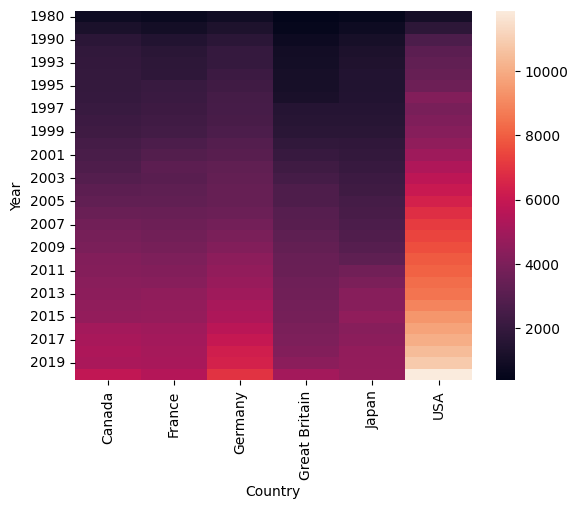

In [59]:
sns.heatmap(piv2_health)

<Axes: xlabel='Country', ylabel='Year'>

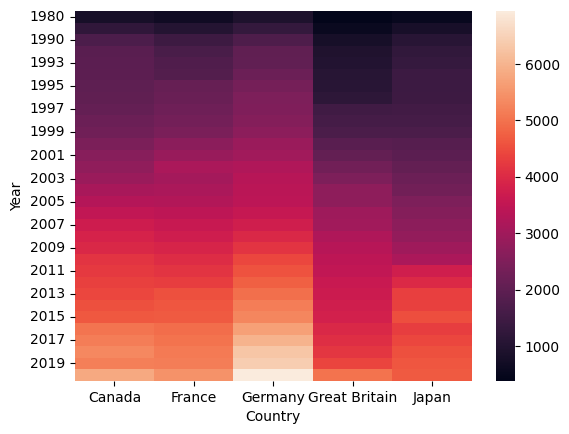

In [60]:
piv2_health = piv2_health.drop("USA",axis=1)
sns.heatmap(piv2_health)

<Axes: xlabel='Life_Expectancy', ylabel='Spending_USD'>

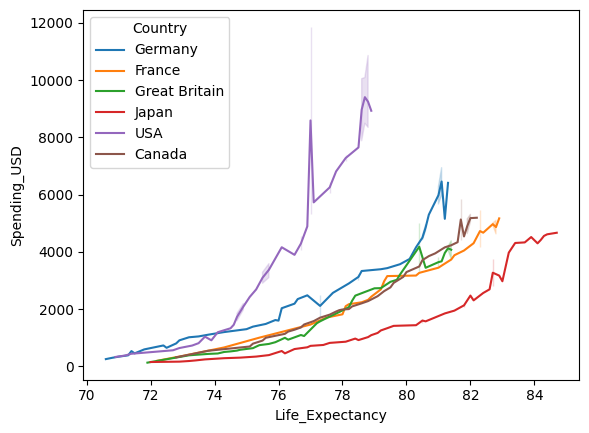

In [64]:
sns.lineplot(x='Life_Expectancy', y='Spending_USD', data=health, hue='Country')

<Axes: xlabel='Year', ylabel='Spending_USD'>

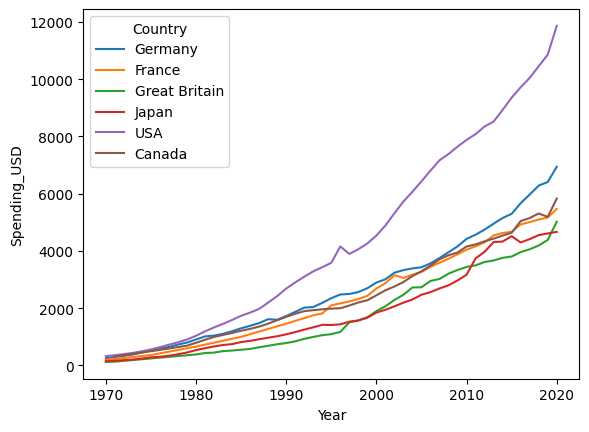

In [65]:
sns.lineplot(x='Year', y='Spending_USD', data=health, hue='Country')

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

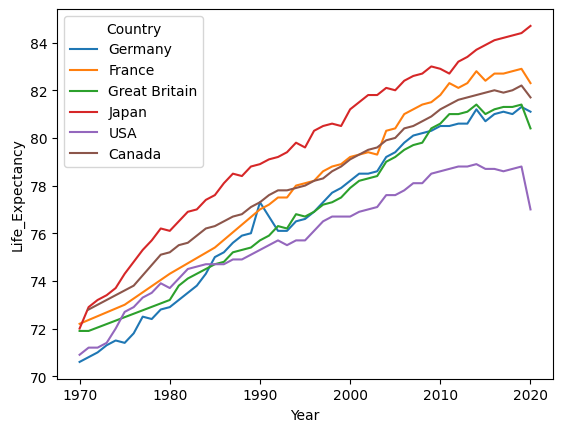

In [77]:
sns.lineplot(x='Year', y='Life_Expectancy', data=health, hue='Country',errorbar='ci')

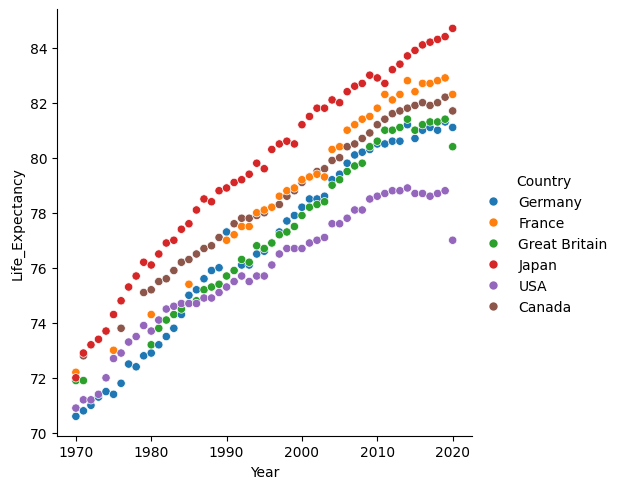

In [79]:
sns.relplot(x='Year', y='Life_Expectancy', data=health, hue='Country')

In [84]:
taxis = sns.load_dataset('taxis')
taxis

pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0.0  12.95  yellow  credit card        Lenox Hill West   
1     0.00    0.0   9.30  yellow         cash  Upper West Side South   
2     2.36    0.0  14.16  yellow  credit card          Alphabet City   
3     6.15    0.0  36.95  yellow  credit card              Hudson Sq   
4     1.10    0.0  13.40  yellow  credit card           Midtown East   
...    ...    ...    ...     ...          ...                    ...   
6428  1.06    0.0   6.36   green  credit card      East Harlem North   
6429  0.00    0.0  58.80   green  credit card                Jamaica   
6430  0.00    0.0  17.30   green         cash    Crown Heights North   
6431  0.00    0.0   6.80   green  credit card          East New York   
6432  3.36    0.0  20.16   green  credit card            Boerum Hill   

                          dropoff_zone pickup_borough dropoff_borough  
0                  UN/Turtle Bay South      Manhattan       Manhattan  
1                Upper West Side South      Manhattan       Manhattan  
2                         West Village      Manhattan       Manhattan  
3                       Yorkville West      Manhattan       Manhattan  
4                       Yorkville West      Manhattan       Manhattan  
...                                ...            ...             ...  
6428              Central Harlem North      Manhattan       Manhattan  
6429  East Concourse/Concourse Village         Queens           Bronx  
6430                    Bushwick North       Brooklyn        Brooklyn  
6431      East Flatbush/Remsen Village       Brooklyn        Brooklyn  
6432                   Windsor Terrace       Brooklyn        Brooklyn  

[6433 rows x 14 columns]

<Axes: xlabel='fare', ylabel='pickup_borough'>

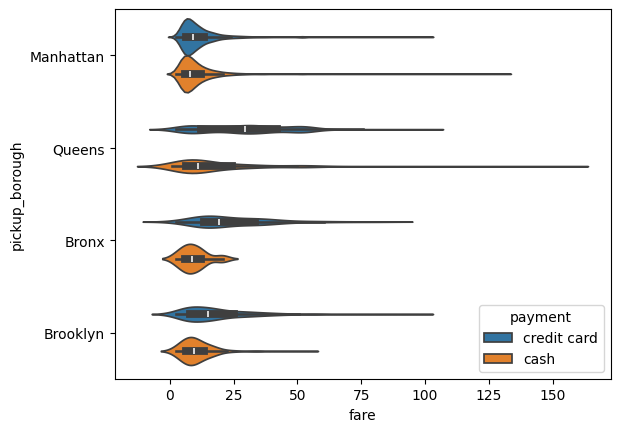

In [87]:
sns.violinplot(data=taxis, y='pickup_borough', x='fare', hue='payment')

<Axes: xlabel='distance', ylabel='fare'>

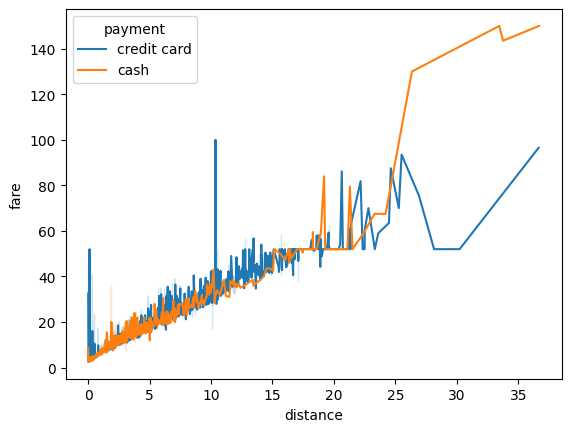

In [91]:
sns.lineplot(data=taxis, y='fare', x='distance', hue='payment')

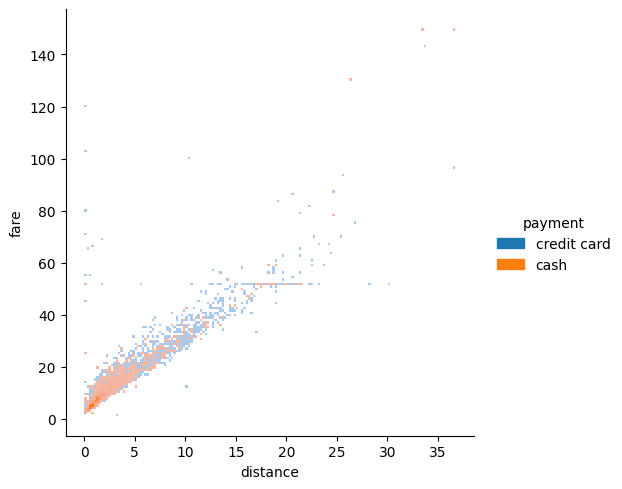

In [92]:
sns.displot(data=taxis, x='distance', y='fare', hue='payment')